# Telecom Churn - Group Case Study
### By: Simranjeet Singh and Kartik Mehra

## Importing Libraries

In [1]:
    
# conda install -c conda-forge imbalanced-learn

In [179]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from sklearn.metrics import  precision_score, recall_score, roc_auc_score, roc_curve,f1_score

from imblearn.metrics import sensitivity_specificity_support

from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing the Data Set

In [4]:
telecom_df=pd.read_csv("telecom_churn_data.csv")
telecom_df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

## Performing basic data checks

In [5]:
telecom_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [6]:
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
telecom_df.shape

(99999, 226)

We have 4 colums that are using names instead for numbers for months so will make it consistent

In [8]:
telecom_df.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [9]:
telecom_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

## Checking the null values

In [10]:
def calc_null_per():
    return round((telecom_df.isnull().sum()/telecom_df.shape[0])*100,2)
calc_null_per()

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [11]:
telecom_df.shape

(99999, 226)

In [12]:
((telecom_df.isnull().sum()/telecom_df.shape[0])*100).value_counts()

0.000000     60
3.937039     29
5.378054     29
3.859039     29
7.745077     29
74.428744    10
74.846748    10
73.660737    10
74.077741    10
1.018010      3
1.607016      1
1.100011      1
0.601006      1
4.760048      1
1.659017      1
3.622036      1
1.767018      1
dtype: int64

In [13]:
cols_with_1_unique = telecom_df.columns[telecom_df.nunique()<2]

In [14]:
telecom_df[cols_with_1_unique].describe(include='all')

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
count,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0
unique,NaN,NaN,NaN,NaN,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Dropping columns with same value in all the columns
telecom_df = telecom_df.loc[:,~(telecom_df.nunique()<2)]

In [16]:
telecom_df.shape

(99999, 210)

In [17]:
# Dropping mobile number as well as it has all the unique values
telecom_df.drop("mobile_number",inplace=True,axis=1)
telecom_df.shape

(99999, 209)

Checking 

In [18]:
telecom_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,

#### Checking missing values related to recharge

In [19]:
for i in range(6,10):
    print(telecom_df[telecom_df["date_of_last_rech_data_"+str(i)].isna()][['total_rech_data_'+str(i),
                                                                           'date_of_last_rech_data_'+str(i),
                                                                          'av_rech_amt_data_'+str(i)]].isna().sum())
    

total_rech_data_6           74846
date_of_last_rech_data_6    74846
av_rech_amt_data_6          74846
dtype: int64
total_rech_data_7           74428
date_of_last_rech_data_7    74428
av_rech_amt_data_7          74428
dtype: int64
total_rech_data_8           73660
date_of_last_rech_data_8    73660
av_rech_amt_data_8          73660
dtype: int64
total_rech_data_9           74077
date_of_last_rech_data_9    74077
av_rech_amt_data_9          74077
dtype: int64


We can see that when the date of last data recharge is null then the total rech data and recharge amount is also null.

So we can fill the nulls with 0 for reach amount and data

In [20]:
for i in range(6,10):
    telecom_df[['total_rech_data_'+str(i),'av_rech_amt_data_'+str(i)]] = telecom_df[['total_rech_data_'+str(i),'av_rech_amt_data_'+str(i)]].fillna(0)
    print(telecom_df[['total_rech_data_'+str(i),'av_rech_amt_data_'+str(i)]].isna().sum())

total_rech_data_6     0
av_rech_amt_data_6    0
dtype: int64
total_rech_data_7     0
av_rech_amt_data_7    0
dtype: int64
total_rech_data_8     0
av_rech_amt_data_8    0
dtype: int64
total_rech_data_9     0
av_rech_amt_data_9    0
dtype: int64


In [21]:
calc_null_per()

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

#### checking columns with data info

In [22]:
monthNum = '6'
telecom_df.loc[telecom_df['arpu_3g_'+monthNum].isna(),['count_rech_3g_'+monthNum, 'vol_3g_mb_'+monthNum,
                            'monthly_3g_'+monthNum, 'sachet_3g_'+monthNum,
                           ]].describe(include='all')

,count_rech_3g_6,vol_3g_mb_6,monthly_3g_6,sachet_3g_6
count,0.0,74846.0,74846.0,74846.0
mean,NaN,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0
max,NaN,0.0,0.0,0.0


In [23]:
telecom_df[['arpu_3g_'+monthNum,'count_rech_3g_'+monthNum]].isna().sum()

arpu_3g_6          74846
count_rech_3g_6    74846
dtype: int64

In [24]:
monthNum = '7'
telecom_df.loc[telecom_df['arpu_3g_'+monthNum].isna(),['count_rech_3g_'+monthNum, 'vol_3g_mb_'+monthNum,
                            'monthly_3g_'+monthNum, 'sachet_3g_'+monthNum,
                           ]].describe(include='all')

,count_rech_3g_7,vol_3g_mb_7,monthly_3g_7,sachet_3g_7
count,0.0,74428.0,74428.0,74428.0
mean,NaN,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0
max,NaN,0.0,0.0,0.0


In [25]:
telecom_df[['arpu_3g_'+monthNum,'count_rech_3g_'+monthNum]].isna().sum()

arpu_3g_7          74428
count_rech_3g_7    74428
dtype: int64

In [26]:
monthNum = '8'
telecom_df.loc[telecom_df['arpu_3g_'+monthNum].isna(),['count_rech_3g_'+monthNum, 'vol_3g_mb_'+monthNum,
                            'monthly_3g_'+monthNum, 'sachet_3g_'+monthNum,
                           ]].describe(include='all')

,count_rech_3g_8,vol_3g_mb_8,monthly_3g_8,sachet_3g_8
count,0.0,73660.0,73660.0,73660.0
mean,NaN,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0
max,NaN,0.0,0.0,0.0


In [27]:
telecom_df[['arpu_3g_'+monthNum,'count_rech_3g_'+monthNum]].isna().sum()

arpu_3g_8          73660
count_rech_3g_8    73660
dtype: int64

In [28]:
# telecom_df[(((telecom_df['total_rech_amt_8'].isnull()) | (telecom_df['total_rech_amt_8']==0) ) & 
#             ((telecom_df['date_of_last_rech_8'].isnull()) | (telecom_df['date_of_last_rech_8']==0) ))]['total_rech_num_8'].sum()

In [29]:
monthNum = '9'
telecom_df.loc[telecom_df['arpu_3g_'+monthNum].isna(),['count_rech_3g_'+monthNum, 'vol_3g_mb_'+monthNum,
                            'monthly_3g_'+monthNum, 'sachet_3g_'+monthNum,
                           ]].describe(include='all')

,count_rech_3g_9,vol_3g_mb_9,monthly_3g_9,sachet_3g_9
count,0.0,74077.0,74077.0,74077.0
mean,NaN,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0
max,NaN,0.0,0.0,0.0


In [30]:
telecom_df[['arpu_3g_'+monthNum,'count_rech_3g_'+monthNum]].isna().sum()

arpu_3g_9          74077
count_rech_3g_9    74077
dtype: int64

#### So for all the month when the montly schemes , small sachets and the amount of the data usage is 0, the count of recharge for 3g and the revepenue is null, so we can  impute null values with 0, also the amount of nan is also same for both columns is exactly same. Hence will replace nan with 0

In [31]:
for i in range(6,10):
    monthNum = str(i)
    telecom_df['arpu_3g_'+monthNum] = telecom_df['arpu_3g_'+monthNum].fillna(0)
    telecom_df['count_rech_3g_'+monthNum] = telecom_df['count_rech_3g_'+monthNum].fillna(0)

In [32]:
monthNum = '6'
telecom_df.loc[telecom_df['arpu_2g_'+monthNum].isna(),['count_rech_2g_'+monthNum, 'vol_2g_mb_'+monthNum,
                            'monthly_2g_'+monthNum, 'sachet_2g_'+monthNum,
                           ]].describe(include='all')

,count_rech_2g_6,vol_2g_mb_6,monthly_2g_6,sachet_2g_6
count,0.0,74846.0,74846.0,74846.0
mean,NaN,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0
max,NaN,0.0,0.0,0.0


In [33]:
telecom_df[['arpu_2g_'+monthNum,'count_rech_2g_'+monthNum]].isna().sum()

arpu_2g_6          74846
count_rech_2g_6    74846
dtype: int64

In [34]:
monthNum = '7'
telecom_df.loc[telecom_df['arpu_2g_'+monthNum].isna(),['count_rech_2g_'+monthNum, 'vol_2g_mb_'+monthNum,
                            'monthly_2g_'+monthNum, 'sachet_2g_'+monthNum,
                           ]].describe(include='all')

,count_rech_2g_7,vol_2g_mb_7,monthly_2g_7,sachet_2g_7
count,0.0,74428.0,74428.0,74428.0
mean,NaN,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0
max,NaN,0.0,0.0,0.0


In [35]:
telecom_df[['arpu_2g_'+monthNum,'count_rech_2g_'+monthNum]].isna().sum()

arpu_2g_7          74428
count_rech_2g_7    74428
dtype: int64

In [36]:
monthNum = '8'
telecom_df.loc[telecom_df['arpu_2g_'+monthNum].isna(),['count_rech_2g_'+monthNum, 'vol_2g_mb_'+monthNum,
                            'monthly_2g_'+monthNum, 'sachet_2g_'+monthNum,
                           ]].describe(include='all')

,count_rech_2g_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8
count,0.0,73660.0,73660.0,73660.0
mean,NaN,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0
max,NaN,0.0,0.0,0.0


In [37]:
telecom_df[['arpu_2g_'+monthNum,'count_rech_2g_'+monthNum]].isna().sum()

arpu_2g_8          73660
count_rech_2g_8    73660
dtype: int64

In [38]:
monthNum = '9'
telecom_df.loc[telecom_df['arpu_2g_'+monthNum].isna(),['count_rech_2g_'+monthNum, 'vol_2g_mb_'+monthNum,
                            'monthly_2g_'+monthNum, 'sachet_2g_'+monthNum,
                           ]].describe(include='all')

,count_rech_2g_9,vol_2g_mb_9,monthly_2g_9,sachet_2g_9
count,0.0,74077.0,74077.0,74077.0
mean,NaN,0.0,0.0,0.0
std,NaN,0.0,0.0,0.0
min,NaN,0.0,0.0,0.0
25%,NaN,0.0,0.0,0.0
50%,NaN,0.0,0.0,0.0
75%,NaN,0.0,0.0,0.0
max,NaN,0.0,0.0,0.0


In [39]:
telecom_df[['arpu_2g_'+monthNum,'count_rech_2g_'+monthNum]].isna().sum()

arpu_2g_9          74077
count_rech_2g_9    74077
dtype: int64

#### same behaviour is observed for 2g revenue data 

In [40]:
for i in range(6,10):
    monthNum = str(i)
    telecom_df['arpu_2g_'+monthNum] = telecom_df['arpu_2g_'+monthNum].fillna(0)
    telecom_df['count_rech_2g_'+monthNum] = telecom_df['count_rech_2g_'+monthNum].fillna(0)

In [41]:
calc_null_per()

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

#### Let's check the all outgoing related features

In [42]:

monthNum = '6'
telecom_df.loc[telecom_df['isd_og_mou_'+monthNum].isna(),['loc_og_mou_'+monthNum,'std_og_mou_'+monthNum,'og_others_'+monthNum, 
                            'total_og_mou_'+monthNum]].describe(include='all')

,loc_og_mou_6,std_og_mou_6,og_others_6,total_og_mou_6
count,0.0,0.0,0.0,3937.0
mean,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,0.0
max,NaN,NaN,NaN,0.0


In [43]:

monthNum = '7'
telecom_df.loc[telecom_df['isd_og_mou_'+monthNum].isna(),['loc_og_mou_'+monthNum,'std_og_mou_'+monthNum,'og_others_'+monthNum, 
                            'total_og_mou_'+monthNum]].describe(include='all')

,loc_og_mou_7,std_og_mou_7,og_others_7,total_og_mou_7
count,0.0,0.0,0.0,3859.0
mean,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,0.0
max,NaN,NaN,NaN,0.0


In [44]:

monthNum = '8'
telecom_df.loc[telecom_df['isd_og_mou_'+monthNum].isna(),['loc_og_mou_'+monthNum,'std_og_mou_'+monthNum,'og_others_'+monthNum, 
                            'total_og_mou_'+monthNum]].describe(include='all')

,loc_og_mou_8,std_og_mou_8,og_others_8,total_og_mou_8
count,0.0,0.0,0.0,5378.0
mean,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,0.0
max,NaN,NaN,NaN,0.0


In [45]:

monthNum = '9'
telecom_df.loc[telecom_df['isd_og_mou_'+monthNum].isna(),['loc_og_mou_'+monthNum,'std_og_mou_'+monthNum,'og_others_'+monthNum, 
                            'total_og_mou_'+monthNum]].describe(include='all')

,loc_og_mou_9,std_og_mou_9,og_others_9,total_og_mou_9
count,0.0,0.0,0.0,7745.0
mean,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,0.0
max,NaN,NaN,NaN,0.0


In [46]:
for i in range(6,10):
    monthNum = str(i)
    telecom_df['isd_og_mou_'+monthNum] = telecom_df['isd_og_mou_'+monthNum].fillna(0)

In [47]:
max_rech_data_cols = ["max_rech_data_"+str(i) for i in range(6,10) ]

In [48]:
telecom_df[max_rech_data_cols].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,25153.000000,25571.000000,26339.000000,25922.00000
mean,126.393392,126.729459,125.717301,124.94144
std,108.477235,109.765267,109.437851,111.36376
min,1.000000,1.000000,1.000000,1.00000
25%,25.000000,25.000000,25.000000,25.00000
50%,145.000000,145.000000,145.000000,145.00000
75%,177.000000,177.000000,179.000000,179.00000
max,1555.000000,1555.000000,1555.000000,1555.00000


We can see that the min value of the max recharge data is 1, hence null values means 0 or data so will replace with 0

In [49]:
telecom_df[max_rech_data_cols] = telecom_df[max_rech_data_cols].fillna(0)

In [50]:
telecom_df[max_rech_data_cols].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000
mean,31.792048,32.406314,33.113011,32.387644
std,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,8.000000,14.000000,17.000000,17.000000
max,1555.000000,1555.000000,1555.000000,1555.000000


In [51]:
fbAndVP = np.array([("fb_user_"+str(i),"night_pck_user_"+str(i)) for i in range(6,10) ]).ravel()

In [52]:
telecom_df[fbAndVP].isnull().sum()

fb_user_6           74846
night_pck_user_6    74846
fb_user_7           74428
night_pck_user_7    74428
fb_user_8           73660
night_pck_user_8    73660
fb_user_9           74077
night_pck_user_9    74077
dtype: int64

In [53]:
monthNum = '6'
telecom_df[telecom_df["max_rech_data_"+monthNum]==0][["fb_user_"+monthNum,"night_pck_user_"+monthNum]]

,fb_user_6,night_pck_user_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
...,...,...
99991,NaN,NaN
99992,NaN,NaN
99993,NaN,NaN
99994,NaN,NaN


In [54]:
monthNum = '7'
telecom_df[telecom_df["max_rech_data_"+monthNum]==0][["fb_user_"+monthNum,"night_pck_user_"+monthNum]]

,fb_user_7,night_pck_user_7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
...,...,...
99993,NaN,NaN
99994,NaN,NaN
99995,NaN,NaN
99996,NaN,NaN


In [55]:
monthNum = '8'
telecom_df[telecom_df["max_rech_data_"+monthNum]==0][["fb_user_"+monthNum,"night_pck_user_"+monthNum]]

,fb_user_8,night_pck_user_8
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
...,...,...
99993,NaN,NaN
99994,NaN,NaN
99995,NaN,NaN
99996,NaN,NaN


In [56]:
monthNum = '9'
telecom_df[telecom_df["max_rech_data_"+monthNum]==0][["fb_user_"+monthNum,"night_pck_user_"+monthNum]]

,fb_user_9,night_pck_user_9
0,NaN,NaN
1,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
...,...,...
99993,NaN,NaN
99994,NaN,NaN
99995,NaN,NaN
99996,NaN,NaN


- fb_user_6           : 74846
- night_pck_user_6    : 74846

- fb_user_7           : 74428
- night_pck_user_7    : 74428

- fb_user_8           : 73660
- night_pck_user_8    : 73660

- fb_user_9           : 74077
- night_pck_user_9    : 74077

These were the total number of missing values and after checking the number of missing values when there was no data recharge done, we observe that the total number of observatons for fb_users and night pack are exaclty same , **hence missing values means that ther was no social media and night scheme was opted hence will replace nulls with 0**

In [57]:
telecom_df[fbAndVP] = telecom_df[fbAndVP].fillna(0)
telecom_df[fbAndVP].isnull().sum()

fb_user_6           0
night_pck_user_6    0
fb_user_7           0
night_pck_user_7    0
fb_user_8           0
night_pck_user_8    0
fb_user_9           0
night_pck_user_9    0
dtype: int64

In [58]:
calc_null_per()

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

In [59]:
# monthNum = '9'
# descri_data = telecom_df[telecom_df['total_rech_num_'+monthNum]==0][numCols].describe(include='all')
# descri_data = descri_data[descri_data.columns[ ((descri_data.loc["min",:]==0) | (descri_data.loc["min",:].isna())) & 
#                                 ((descri_data.loc["max",:]==0) | (descri_data.loc["max",:].isna()))]]
# descri_data

In [60]:
# filterCol = list(filter(lambda x: x.split('_')[-1]==monthNum,descri_data.columns))
# print(filterCol)
# telecom_df.loc[telecom_df['total_rech_num_'+monthNum]==0,filterCol]=telecom_df.loc[telecom_df['total_rech_num_'+monthNum]==0,filterCol].fillna(0)
# telecom_df[telecom_df['total_rech_num_'+monthNum]==0][filterCol].isna().sum()

In [61]:
telecom_df.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000

In [62]:
for i in range(6,10):
    telecom_df.loc[telecom_df["arpu_"+str(i)]<0,"arpu_"+str(i)]=0

## New Feature Creation

Now we have values for 'total_rech_data_' and 'av_rech_amt_data_' (for months 6, 7, 8 & 9). Using these 2 values we can derive new feature for the respective months called **total_data_rech_amt_** which equals **total_rech_data_ * av_rech_amt_data_**

Also this new feature would help in computing the total data recharge amount - 'total_data_rech_amt_' for the months 6, 7, 8 & 9.

In [63]:
for i in range(6,10):
    telecom_df['total_data_rech_amt_'+str(i)] = telecom_df['total_rech_data_'+str(i)] * telecom_df['av_rech_amt_data_'+str(i)]


In [64]:
telecom_df[["total_data_rech_amt_6","total_data_rech_amt_7","total_data_rech_amt_8","total_data_rech_amt_9"]].isnull().sum()

total_data_rech_amt_6    0
total_data_rech_amt_7    0
total_data_rech_amt_8    0
total_data_rech_amt_9    0
dtype: int64

In [65]:
calc_null_per()

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

### Finding high values customer

In [66]:
# Lets compute the average recharge amount for the month 6 & 7. This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

average_recharge_amount_for_month_6_7 = telecom_df[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

percent_70th = np.percentile(average_recharge_amount_for_month_6_7, 70)

percent_70th

239.0

In [67]:
telecom_df = telecom_df[average_recharge_amount_for_month_6_7>=percent_70th]
telecom_df.reset_index(drop=True,inplace=True)
telecom_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.0,0.00,0.00,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0

In [68]:
telecom_df.shape

(30001, 213)

### Creating target variable

Now we will create another variable **churn** (1 or 0) and we will use month 9 as that is the churning period 

customer will churn if he is int voice calling (incoming and outgoing) and not using data (2g or 3g)

So the 4 paramaters are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [69]:
telecom_df['churn'] = telecom_df.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [70]:
telecom_df['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

We will not be using month 9 for prediction as that is the preiod for which we are predicting, so will drop all the columns related to month 9

In [71]:
cols_9 = [i for i in telecom_df.columns if '_9' in i]
cols_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_data_rech_amt_9']

In [72]:
telecom_df.drop(cols_9,axis=1,inplace=True)

In [73]:
telecom_df.shape

(30001, 161)

In [74]:
calc_null_per()

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.82
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.82
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6                 1.82
loc_og_mou_7                 1.79
loc_og_mou_8  

More than 40% of the data is missing for the dateof last recharge columns for each month and date is something we cannot assume at such a large scale so will drop these

In [75]:
telecom_df.drop(telecom_df.columns[calc_null_per()>40],axis=1,inplace=True)

In [76]:
calc_null_per()

arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
onnet_mou_6              1.82
onnet_mou_7              1.79
onnet_mou_8              3.91
offnet_mou_6             1.82
offnet_mou_7             1.79
offnet_mou_8             3.91
roam_ic_mou_6            1.82
roam_ic_mou_7            1.79
roam_ic_mou_8            3.91
roam_og_mou_6            1.82
roam_og_mou_7            1.79
roam_og_mou_8            3.91
loc_og_t2t_mou_6         1.82
loc_og_t2t_mou_7         1.79
loc_og_t2t_mou_8         3.91
loc_og_t2m_mou_6         1.82
loc_og_t2m_mou_7         1.79
loc_og_t2m_mou_8         3.91
loc_og_t2f_mou_6         1.82
loc_og_t2f_mou_7         1.79
loc_og_t2f_mou_8         3.91
loc_og_t2c_mou_6         1.82
loc_og_t2c_mou_7         1.79
loc_og_t2c_mou_8         3.91
loc_og_mou_6             1.82
loc_og_mou_7             1.79
loc_og_mou_8             3.91
std_og_t2t_mou_6         1.82
std_og_t2t_mou_7         1.79
std_og_t2t_mou_8         3.91
std_og_t2m


**WE will be using variables `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9` and `vol_3g_mb_9` for this scenario. So, we will drop the idividual columns which will also help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity.**

Let's now drop all those individual columns whose totals are available.

In [77]:
# Let's drop individual columns whose totals are available as a different attribute

cols_to_drop = ['std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                    'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'
                   ]

telecom_df.drop(cols_to_drop, axis = 1, inplace = True)

telecom_df.shape

(30001, 107)

We will drop colums related to date as well

In [78]:
telecom_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [79]:
catType = telecom_df.columns[telecom_df.nunique()==2]

In [80]:
telecom_df[catType].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.013566,0.012500,0.011366,0.517483,0.524049,0.477084,0.081364
std,0.115683,0.111102,0.106007,0.499703,0.499430,0.499483,0.273398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
telecom_df[catType] = telecom_df[catType].astype('object')

In [82]:
numCols = telecom_df.columns[telecom_df.dtypes!='object']
catCols = telecom_df.columns[telecom_df.dtypes=='object']

In [83]:
numCols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'tota

In [84]:
catCols

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn'], dtype='object')

In [85]:
telecom_df[telecom_df.columns[calc_null_per()>0]]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00
1,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14
2,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,378.09,288.18,63.04,130.26,143.48,98.28,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.0,0.0,125.33,87.68,159.11,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,131.91,133.68,182.14,2.36,6.35,39.61,0.10,0.00,17.71,0.00,0.0,0.0,116.63,174.41,224.21,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,78.68,29.04,103.24,56.13,28.09,61.44,0.00,0.00,0.00,0.00,0.00,0.00,124.74,49.94,150.59,6.15,0.00,14.01,3.91,7.20,0.08,0.00,0.0,0.0,378.99,337.28,402.58,99.19,7.43,17.36,0.13,0.0,0.0,0.00,0.06,0.00,0.15,0.00,0.51
29997,423.99,181.83,5.71,39.51,39.81,18.26,0.00,0.00,0.00,0.00,0.00,0.00,441.96,202.29,16.69,0.03,3.96,0.00,21.51,15.38,7.28,1.06,0.0,0.0,85.71,121.91,102.81,3.33,1.79,0.00,0.43,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
29998,806.73,549.36,775.41,784.76,617.13,595.44,0.00,0.00,0.00,0.00,0.00,0.00,1300.43,1062.48,1225.06,284.39,104.01,145.79,15.96,16.71,9.15,0.00,0.0,0.0,566.26,618.08,635.84,14.46,3.76,24.16,0.00,0.0,0.0,0.00,0.43,0.00,0.00,0.00,0.00
29999,199.89,174.46,2.46,175.88,277.01,248.33,0.00,0.00,0.00,0.00,0.00,0.00,308.11,295.26,130.48,67.66,156.21,120.29,0.00,0.00,0.01,0.00,0.0,0.0,307.31,288.76,1144.64,691.44,86.21,88.86,0.00,0.0,0.0,0.00,0.00,0.00,0.20,0.00,0.31


In [86]:
cols_with_null = telecom_df.columns[calc_null_per()>0]
telecom_df[cols_with_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   onnet_mou_6    29456 non-null  float64
 1   onnet_mou_7    29464 non-null  float64
 2   onnet_mou_8    28827 non-null  float64
 3   offnet_mou_6   29456 non-null  float64
 4   offnet_mou_7   29464 non-null  float64
 5   offnet_mou_8   28827 non-null  float64
 6   roam_ic_mou_6  29456 non-null  float64
 7   roam_ic_mou_7  29464 non-null  float64
 8   roam_ic_mou_8  28827 non-null  float64
 9   roam_og_mou_6  29456 non-null  float64
 10  roam_og_mou_7  29464 non-null  float64
 11  roam_og_mou_8  28827 non-null  float64
 12  loc_og_mou_6   29456 non-null  float64
 13  loc_og_mou_7   29464 non-null  float64
 14  loc_og_mou_8   28827 non-null  float64
 15  std_og_mou_6   29456 non-null  float64
 16  std_og_mou_7   29464 non-null  float64
 17  std_og_mou_8   28827 non-null  float64
 18  spl_og

All the above features are realated to incoming and outgoing calls made within network or outsie network so havin null values means no calling was made hence will replace with 0

In [87]:
telecom_df.loc[:,cols_with_null] = telecom_df.loc[:,cols_with_null].fillna(0)

In [88]:
telecom_df[cols_with_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   onnet_mou_6    30001 non-null  float64
 1   onnet_mou_7    30001 non-null  float64
 2   onnet_mou_8    30001 non-null  float64
 3   offnet_mou_6   30001 non-null  float64
 4   offnet_mou_7   30001 non-null  float64
 5   offnet_mou_8   30001 non-null  float64
 6   roam_ic_mou_6  30001 non-null  float64
 7   roam_ic_mou_7  30001 non-null  float64
 8   roam_ic_mou_8  30001 non-null  float64
 9   roam_og_mou_6  30001 non-null  float64
 10  roam_og_mou_7  30001 non-null  float64
 11  roam_og_mou_8  30001 non-null  float64
 12  loc_og_mou_6   30001 non-null  float64
 13  loc_og_mou_7   30001 non-null  float64
 14  loc_og_mou_8   30001 non-null  float64
 15  std_og_mou_6   30001 non-null  float64
 16  std_og_mou_7   30001 non-null  float64
 17  std_og_mou_8   30001 non-null  float64
 18  spl_og

In [89]:
calc_null_per()

arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_mou_6             0.0
std_og_mou_7             0.0
std_og_mou_8             0.0
isd_og_mou_6             0.0
isd_og_mou_7             0.0
isd_og_mou_8             0.0
spl_og_mou_6             0.0
spl_og_mou_7             0.0
spl_og_mou_8             0.0
og_others_6              0.0
og_others_7              0.0
og_others_8              0.0
total_og_mou_6           0.0
total_og_mou_7           0.0
total_og_mou_8           0.0
loc_ic_mou_6             0.0
loc_ic_mou_7  

Now all the null values are gone, we can proceed for the eda process

In [90]:
# transform = PowerTransformer()
# telecom_df[numCols] = pd.DataFrame(transform.fit_transform(telecom_df[numCols]),columns=numCols)
# telecom_df[numCols].shape

In [91]:
# knn_imputer = KNNImputer() 
# # imputing the missing value with knn imputer 
# telecom_df[numCols] = pd.DataFrame(knn_imputer.fit_transform(telecom_df[numCols]),columns=numCols)

## Univariate Analysis

In [92]:
# Set Style
sns.set(style = "whitegrid")


In [93]:
def add_data_labels(ax, spacing = 5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.2f}%".format(y_value*100)

        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

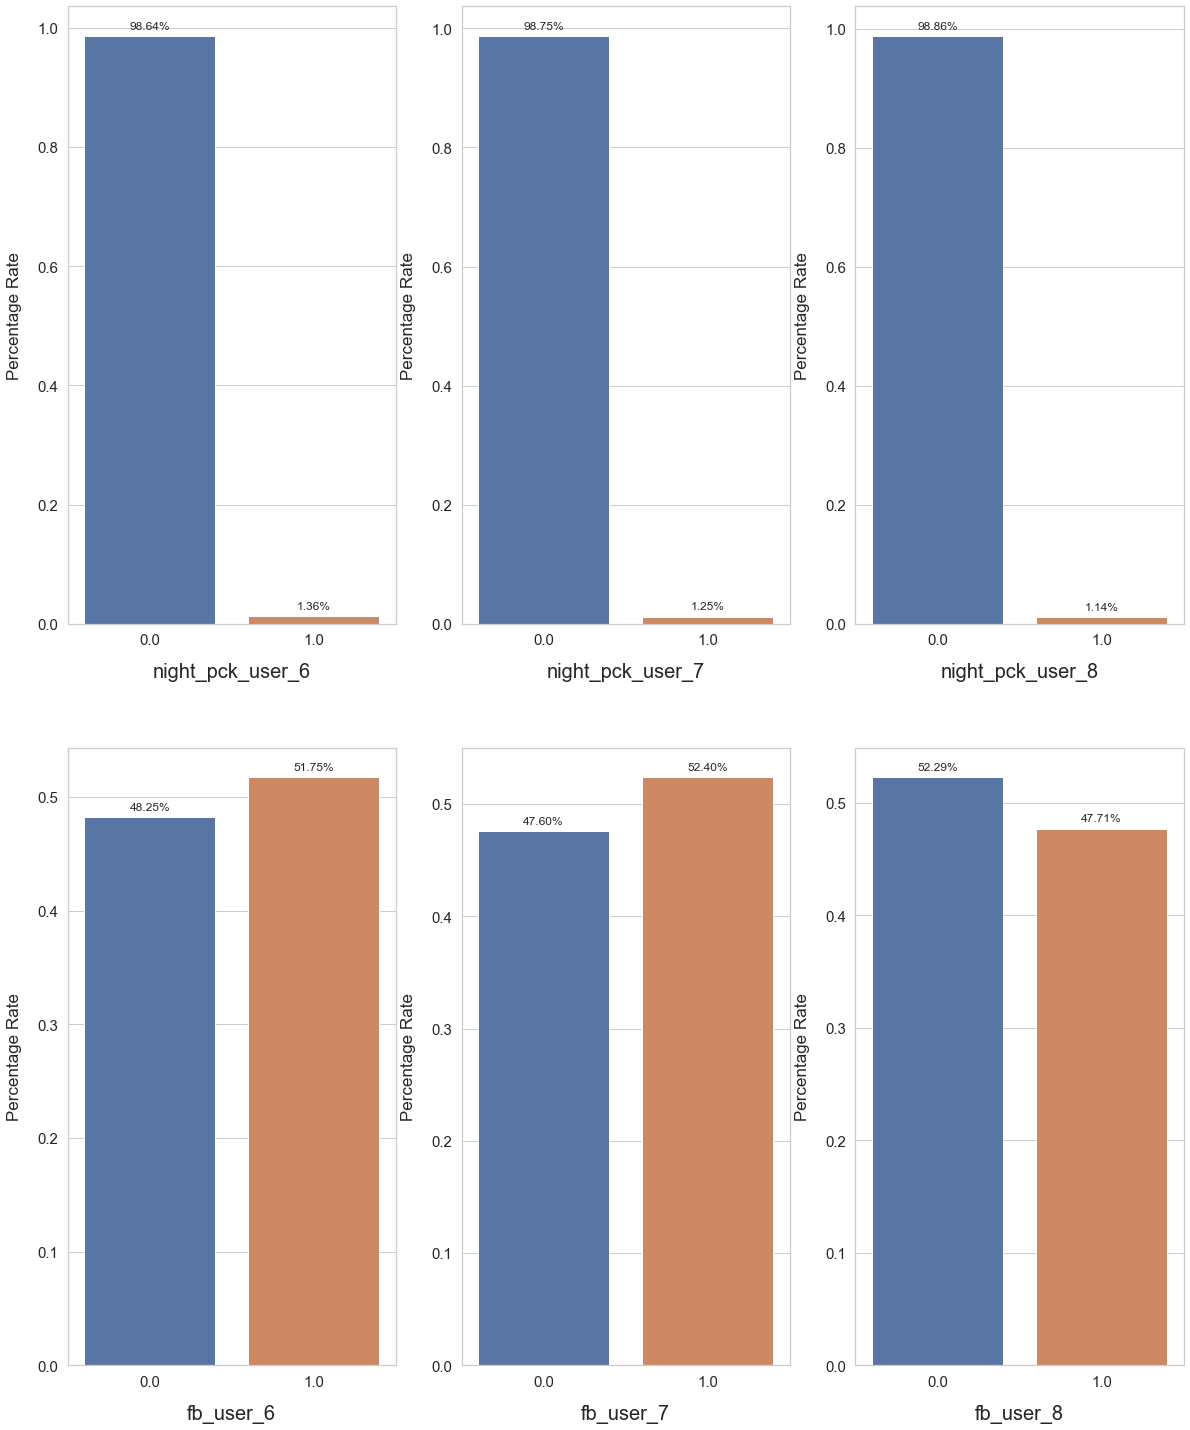

In [94]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
plt.figure(figsize=(20,25))
for i in range(len(category_list)):
    data = telecom_df[category_list[i]].value_counts(normalize=True)
    plt.subplot(2,3,i+1)
    ax = sns.barplot(x = data.index, y = data.values, order = data.sort_index().index)
    add_data_labels(ax)
    plt.xlabel(category_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 15,fontdict={'fontsize':17})
    plt.xlabel(category_list[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

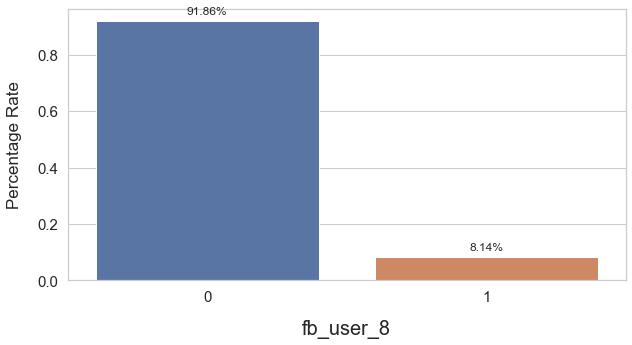

In [95]:
plt.figure(figsize=(10,5))
data = telecom_df['churn'].value_counts(normalize=True)
ax = sns.barplot(x = data.index, y = data.values, order = data.sort_index().index)
add_data_labels(ax)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 15,fontdict={'fontsize':17})
plt.xlabel(category_list[i],fontdict={'fontsize':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

We have data imbalance, and we will handle this while model building

In [96]:
# category_list = numCols

# for i in range(len(category_list)):
#     plt.figure(figsize=(20,8))
#     plt.subplot(1,2,1)
#     sns.distplot(telecom_df[category_list[i]])
# #     ax = sns.boxplot(x = data.index, y = data.values, order = data.sort_index().index)

#     plt.xlabel(category_list[i],fontdict={'fontsize':20})
#     plt.xticks(fontsize=15)
#     plt.yticks(fontsize=15)
    
    
#     plt.subplot(1,2,2)
#     sns.boxplot(telecom_df[category_list[i]])
#     plt.xlabel(category_list[i],fontdict={'fontsize':20})
#     plt.xticks(fontsize=15)
#     plt.yticks(fontsize=15)
#     plt.show()



In [97]:
numCols = telecom_df.columns[telecom_df.dtypes!='object'].to_list()
catCols = telecom_df.columns[telecom_df.dtypes=='object'].to_list()

In [98]:
catCols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn']

In [99]:
numCols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6

In [100]:
# def cap_outliers(array, k=3):
#     upper_limit = array.mean() + k*array.std()
#     lower_limit = array.mean() - k*array.std()
#     array[array<lower_limit] = lower_limit
#     array[array>upper_limit] = upper_limit
#     return array
# telecom_df[numCols]= telecom_df[numCols].apply(cap_outliers, axis=0)


Data Visualization of churn vs arpu


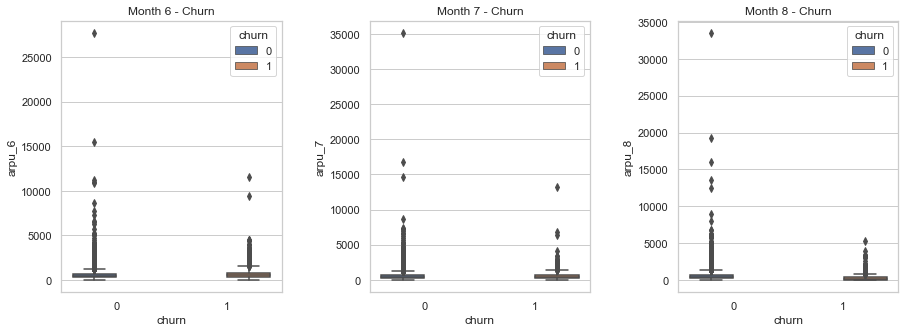


Data Visualization of churn vs offnet_mou


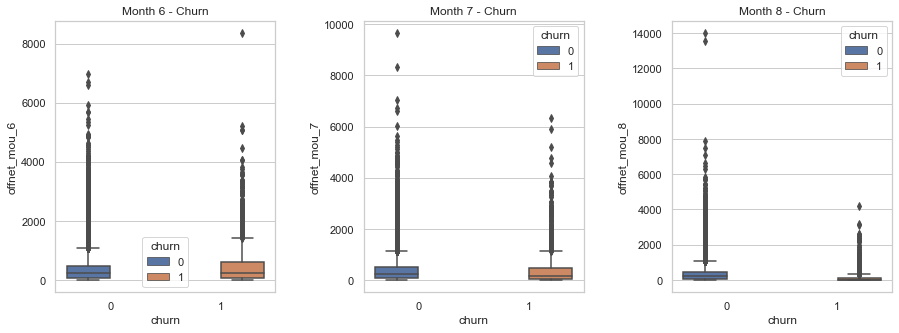


Data Visualization of churn vs onnet_mou


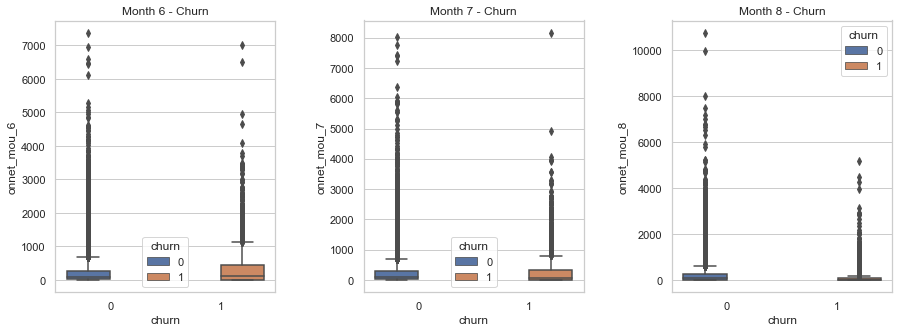


Data Visualization of churn vs total_og_mou


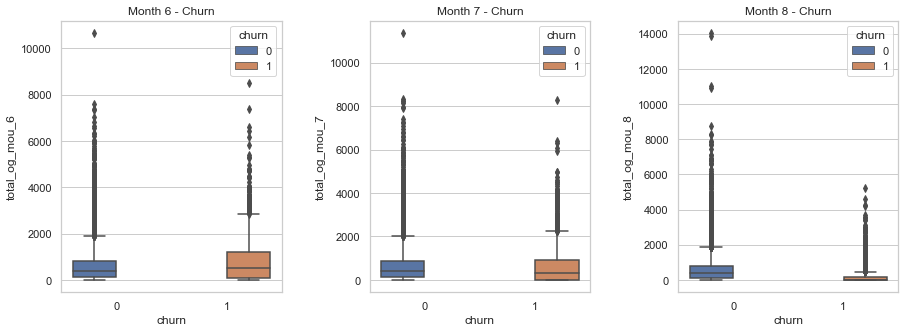


Data Visualization of churn vs total_ic_mou


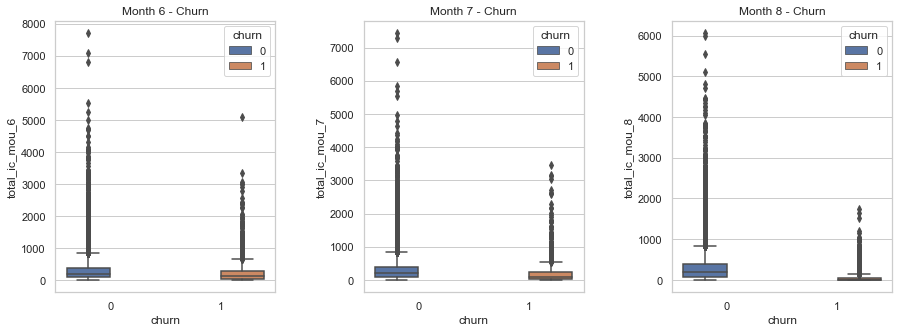


Data Visualization of churn vs total_rech_num


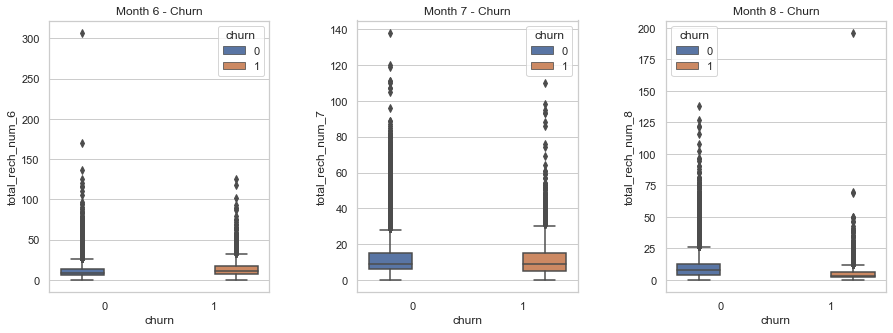


Data Visualization of churn vs total_rech_amt


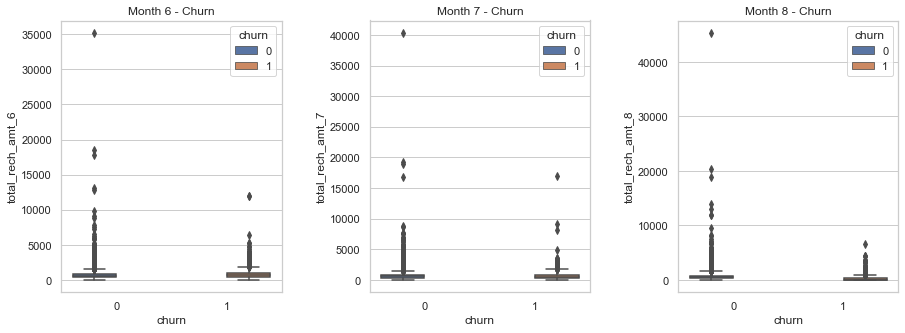


Data Visualization of churn vs total_rech_data


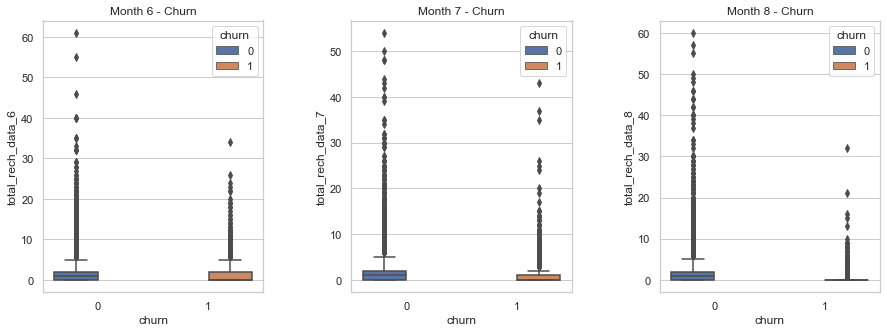


Data Visualization of churn vs vol_2g_mb


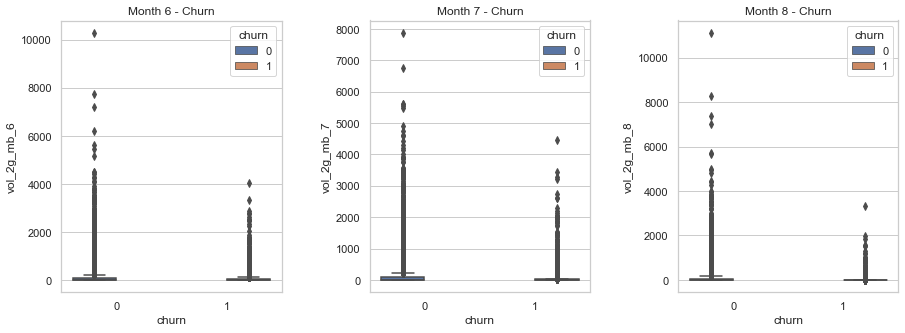


Data Visualization of churn vs vol_3g_mb


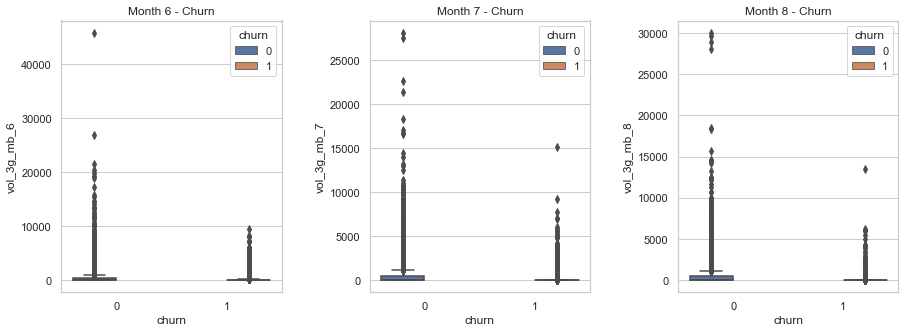


Data Visualization of churn vs vbc_3g


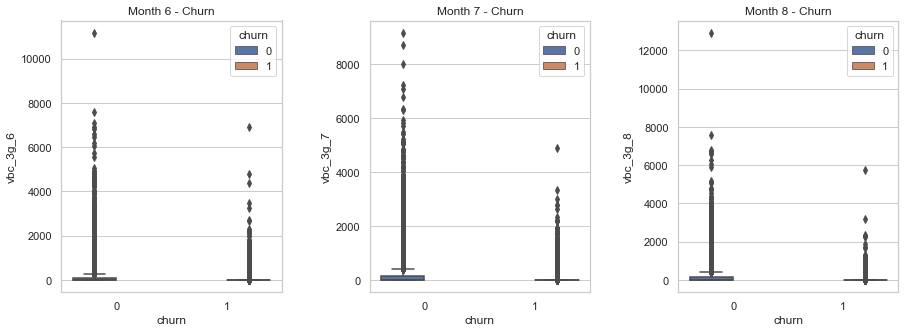


Data Visualization of churn vs total_data_rech_amt


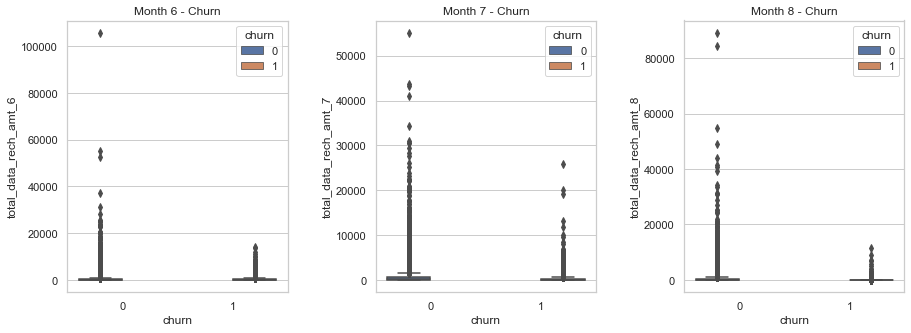

In [101]:
# Bivariate Analysis

cols = ['arpu','offnet_mou','onnet_mou','total_og_mou','total_ic_mou','total_rech_num',
        'total_rech_amt','total_rech_data','vol_2g_mb','vol_3g_mb','vbc_3g','total_data_rech_amt']
for col in cols:
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + col)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = col + "_6", hue = "churn", data = telecom_df)
    plt.title(title_1)

    # Subplot - 2
    plt.subplot(1, 3, 2)
    

    sns.boxplot(x = x_axis, y = col + "_7", hue = "churn", data = telecom_df)
    plt.title(title_2)

    # Subplot - 3
    plt.subplot(1, 3, 3)
    plt.title(title_3)
    sns.boxplot(x = x_axis, y = col + "_8", hue = "churn", data = telecom_df)
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
    



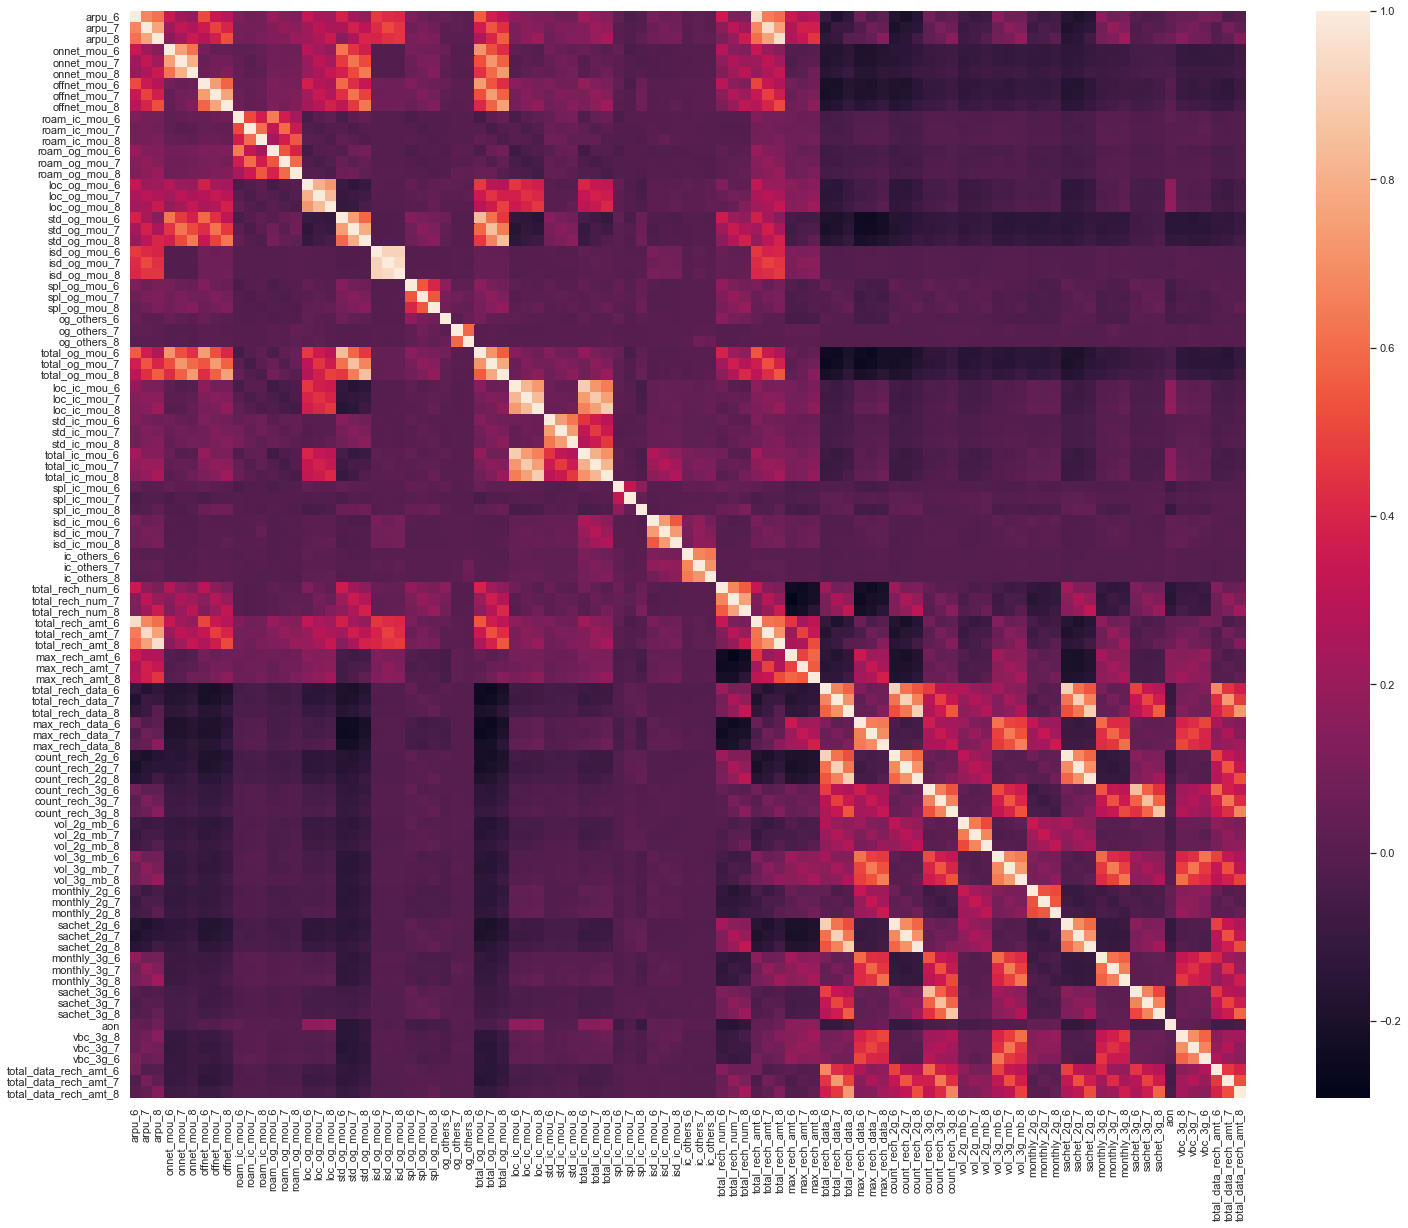

In [102]:
plt.figure(figsize = (25, 20))

sns.heatmap(telecom_df.corr())

plt.show()

In [103]:
telecom_df.shape

(30001, 104)

In [104]:
numCols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6

In [105]:
# corr_matrix = telecom_df.corr().abs()

# #the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
# upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

# highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
# print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
# print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

# Custom Function to derive new good phase columns and drop the original columns 

__ we are divideing the data into good, action and prediction phase. Month 6 & 7 are in good phase , month 8 is the action phase, month 9 is the prediction phase

In [106]:

def make_good_action_data(data, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    data[good_phase_col] = (data[col_6] + data[col_7])/2
    data[action_phase_col] = data[col_8] - data[good_phase_col]
    
    data.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return data

In [107]:
# Derive Good and Action Phase Variables

telecom_df = make_good_action_data(telecom_df, "arpu")

telecom_df = make_good_action_data(telecom_df, "onnet_mou")

telecom_df = make_good_action_data(telecom_df, "offnet_mou")

telecom_df = make_good_action_data(telecom_df, "roam_ic_mou")

telecom_df = make_good_action_data(telecom_df, "roam_og_mou")

telecom_df = make_good_action_data(telecom_df, "loc_og_mou")

telecom_df = make_good_action_data(telecom_df, "std_og_mou")

telecom_df = make_good_action_data(telecom_df, "isd_og_mou")

telecom_df = make_good_action_data(telecom_df, "spl_og_mou")

telecom_df = make_good_action_data(telecom_df, "og_others")

telecom_df = make_good_action_data(telecom_df, "total_og_mou")

telecom_df = make_good_action_data(telecom_df, "loc_ic_mou")

telecom_df = make_good_action_data(telecom_df, "std_ic_mou")

telecom_df = make_good_action_data(telecom_df, "spl_ic_mou")

telecom_df = make_good_action_data(telecom_df, "isd_ic_mou")

telecom_df = make_good_action_data(telecom_df, "ic_others")

telecom_df = make_good_action_data(telecom_df, "total_ic_mou")

telecom_df = make_good_action_data(telecom_df, "total_rech_num")

telecom_df = make_good_action_data(telecom_df, "total_rech_amt")

telecom_df = make_good_action_data(telecom_df, "max_rech_amt")

telecom_df = make_good_action_data(telecom_df, "total_rech_data")

telecom_df = make_good_action_data(telecom_df, "max_rech_data")

telecom_df = make_good_action_data(telecom_df, "count_rech_2g")

telecom_df = make_good_action_data(telecom_df, "count_rech_3g")

telecom_df = make_good_action_data(telecom_df, "vol_2g_mb")

telecom_df = make_good_action_data(telecom_df, "vol_3g_mb")

telecom_df = make_good_action_data(telecom_df, "monthly_2g")

telecom_df = make_good_action_data(telecom_df, "sachet_2g")

telecom_df = make_good_action_data(telecom_df, "monthly_3g")

telecom_df = make_good_action_data(telecom_df, "sachet_3g")

telecom_df = make_good_action_data(telecom_df, "vbc_3g")

telecom_df = make_good_action_data(telecom_df, "total_data_rech_amt")

telecom_df.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,0,0,0,1,1,1,968,1,206.1005,7.7025,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0.0,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.440,3.5,-1.5,307.0,-55.0,252.0,0.0,1.0,0.0,252.0,0.0,0.0,0.0,1.0,0.0,15.725,-9.975,117.165,-7.555,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.600,-20.200,252.0,0.0
1,0,0,0,0,0,0,802,1,1209.5150,1961.9650,56.26,-3.97,510.295,-184.385,24.86,6.78,18.165,19.895,478.035,-222.245,68.000,9.840,0.090,9.920,2.25,4.25,0.0,0.0,548.385,-198.225,391.555,-203.515,176.810,17.130,0.105,-0.105,8.295,23.295,15.465,-0.325,592.250,-163.510,5.0,2.0,1185.0,2453.0,1185.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.060,38.680,0.0,0.0
2,0,0,0,0,1,1,315,0,435.4720,-298.1100,382.36,-347.28,87.645,48.835,0.00,0.00,0.000,0.000,333.135,-270.095,136.870,-38.590,0.000,0.000,0.00,10.23,0.0,0.0,470.010,-298.450,52.630,-36.840,13.545,-12.795,0.000,0.000,0.000,0.000,0.000,0.000,66.175,-49.635,20.0,-6.0,519.0,-399.0,122.0,-92.0,1.0,2.0,77.0,-54.0,1.0,2.0,0.0,0.0,178.000,-177.970,375.475,-363.535,0.5,-0.5,0.5,2.5,0.0,0.0,0.0,0.0,516.405,-495.375,177.0,30.0
3,0,0,0,0,0,0,720,0,556.1030,81.6570,117.26,-32.12,827.305,156.085,0.00,0.00,0.000,0.000,95.565,34.175,848.990,89.800,0.000,0.000,0.00,0.00,0.0,0.0,944.565,123.975,106.505,52.605,62.985,38.945,0.000,0.000,0.000,0.000,0.000,0.000,169.490,91.550,24.0,3.0,640.0,78.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
4,0,0,0,0,1,1,604,0,134.1235,232.8425,49.81,-16.23,87.385,118.505,0.00,0.00,0.000,0.000,132.795,49.345,4.355,35.255,0.005,-0.005,0.05,17.66,0.0,0.0,137.210,102.270,145.520,78.690,8.915,48.375,0.000,0.000,14.115,-10.375,2.675,10.385,171.235,127.095,4.0,0.0,227.0,212.0,89.5,89.5,1.0,1.0,89.5,89.5,0.0,0.0,1.0,1.0,0.240,-0.230,299.545,710.375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25.930,14.520,356.0,184.0


In [108]:
numCols = telecom_df.columns[telecom_df.dtypes!='object'].to_list()
catCols = telecom_df.columns[telecom_df.dtypes=='object'].to_list()

In [109]:
cartType = telecom_df[numCols].columns[telecom_df[numCols].nunique()==2]

In [110]:
catType

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn'], dtype='object')

#### We will be normalizing the data to make it more gausian

In [111]:
# telecom_df_transform = telecom_df.copy()
telecom_df[numCols] = pd.DataFrame(PowerTransformer().fit_transform(telecom_df[numCols]),columns=numCols)

In [112]:
# telecom_df_transform = telecom_df.copy()
# telecom_df_transform = pd.DataFrame(RobustScaler().fit_transform(telecom_df_transform),columns=telecom_df_transform.columns)

In [113]:
telecom_df.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,0,0,0,1,1,1,0.126888,1,-1.309293,0.216418,-1.856329,0.094328,-2.163746,0.123489,-0.611831,0.044557,-0.619558,0.053567,-2.027757,0.089246,-1.366126,0.105088,-0.341698,0.010882,-1.141087,0.009363,-0.533887,0.095534,-2.063457,0.129448,-2.347334,0.082722,-1.580609,0.048436,-0.555543,0.065017,-0.599949,-0.004401,-0.633019,0.006675,-2.452412,0.082115,-1.629645,0.036268,-0.960078,0.085227,0.896252,0.038719,0.145810,0.088072,1.285039,0.054503,-0.935642,0.063201,1.507992,0.053569,0.338326,0.048843,0.919900,0.019658,-0.520132,0.077508,-0.743414,0.047170,2.008318,0.040763,-0.440825,0.038119,1.008595,-0.048308,0.514419,0.087354
1,0,0,0,0,0,0,-0.100028,1,1.655273,5.536728,-0.229845,0.081475,0.688532,-0.409528,1.811091,0.145474,1.657313,0.258830,1.004060,-0.952244,0.127429,0.128271,1.142263,0.730575,0.186126,0.240854,-0.533887,0.095534,0.256233,-0.262663,0.916296,-1.073604,1.538174,0.218915,1.814622,-0.632714,1.823406,0.428360,2.118752,-0.027276,1.117395,-0.675832,-1.054651,0.559015,1.291242,5.566020,3.306907,3.271855,-1.166228,0.088072,-1.232419,0.054503,-0.935642,0.063201,-0.687572,0.053569,-1.025221,0.088071,-0.842082,0.031954,-0.520132,0.077508,-0.743414,0.047170,-0.512429,0.040763,-0.440825,0.038119,0.746554,0.136578,-1.237414,0.087354
2,0,0,0,0,1,1,-1.231885,0,-0.174414,-0.751031,0.863413,-1.022756,-0.616360,0.261792,-0.611831,0.044557,-0.619558,0.053567,0.702887,-1.176588,0.398151,0.015502,-0.341698,0.010882,-1.141087,0.560747,-0.533887,0.095534,0.126110,-0.460520,-0.676826,-0.151187,0.062053,-0.084302,-0.555543,0.065017,-0.599949,-0.004401,-0.633019,0.006675,-0.779308,-0.165406,1.169860,-0.622611,-0.158719,-0.783371,-0.135734,-0.591947,0.145810,0.962081,0.611755,-0.607673,0.609390,1.120356,-0.687572,0.053569,1.136158,-0.621987,1.153018,-0.581091,1.859141,-1.349077,0.511337,1.381703,-0.512429,0.040763,-0.440825,0.038119,1.410597,-1.633209,0.378490,0.107746
3,0,0,0,0,0,0,-0.230275,0,0.232390,0.425817,0.157290,-0.009384,1.166152,0.564151,-0.611831,0.044557,-0.619558,0.053567,-0.179488,0.248886,1.148618,0.318037,-0.341698,0.010882,-1.141087,0.009363,-0.533887,0.095534,0.771072,0.378108,-0.199091,0.343465,0.942379,0.433077,-0.555543,0.065017,-0.599949,-0.004401,-0.633019,0.006675,-0.095450,0.472309,1.446501,0.710351,0.186262,0.397532,-1.321129,0.038719,-1.166228,0.088072,-1.232419,0.054503,-0.935642,0.063201,-0.687572,0.053569,-1.025221,0.088071,-0.842082,0.0

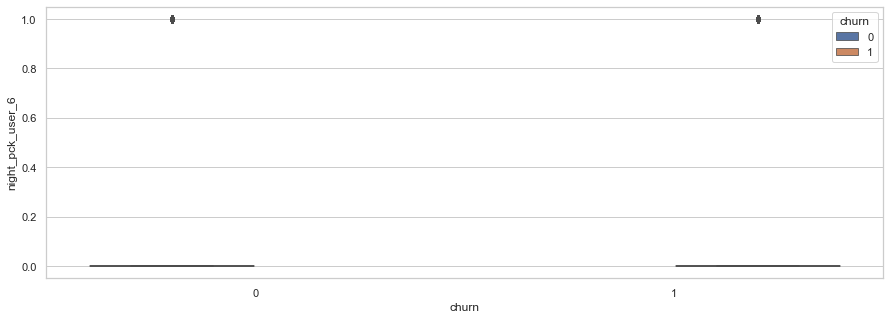

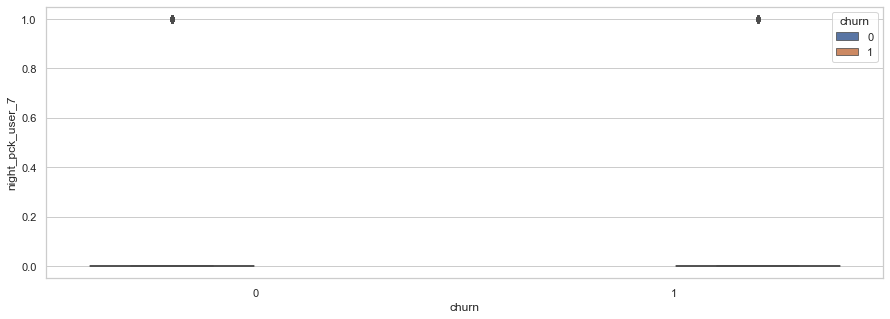

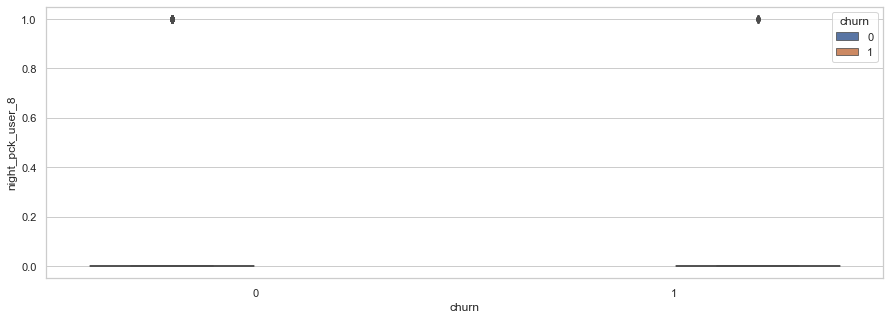

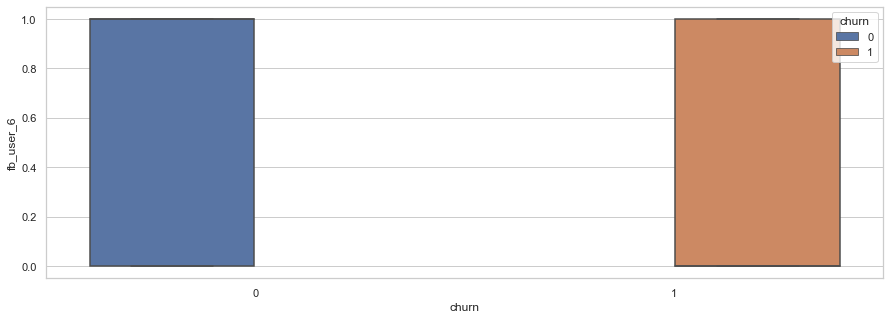

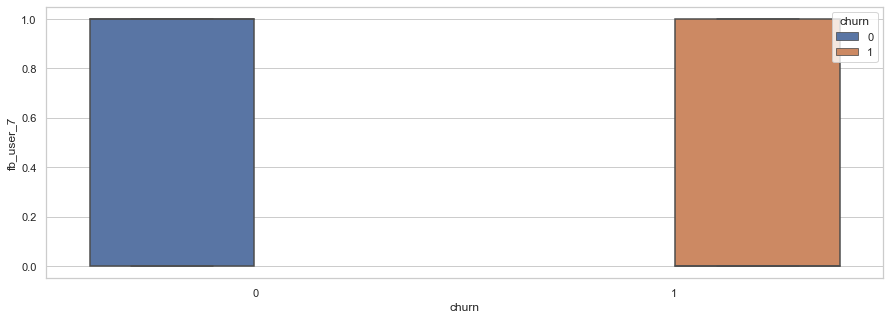

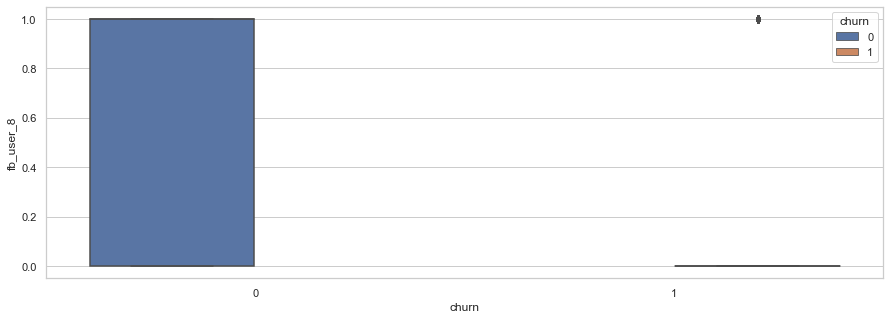

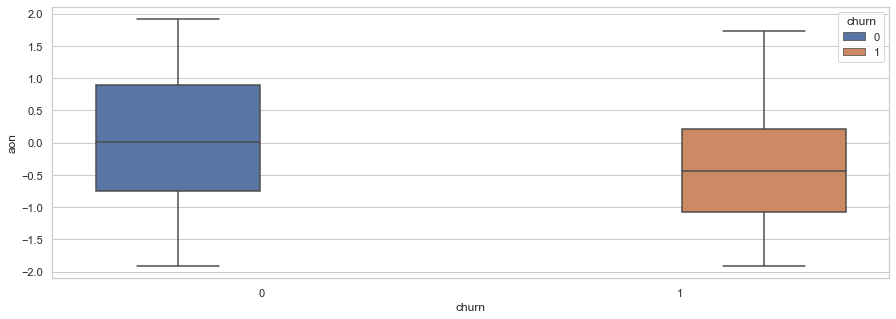

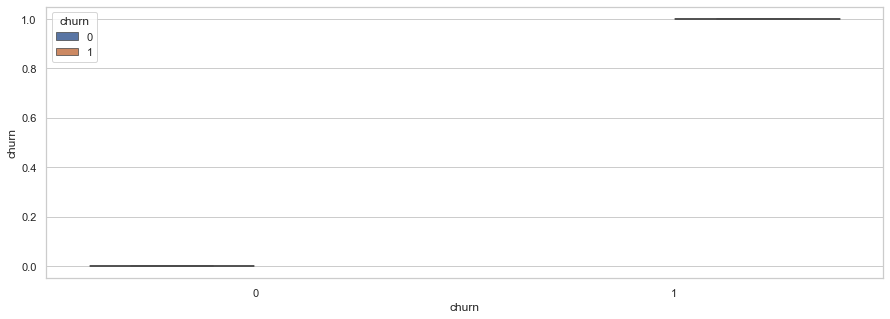

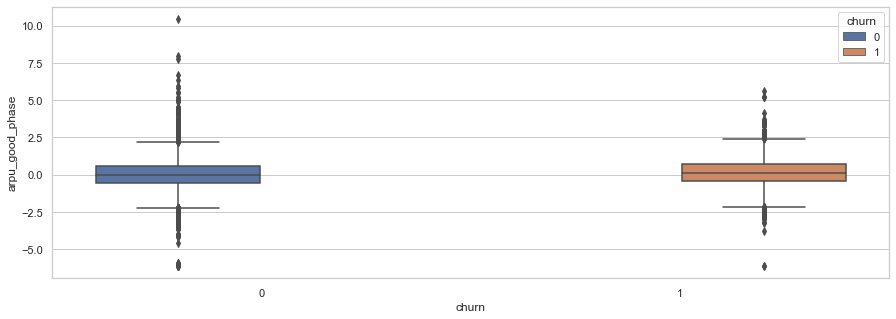

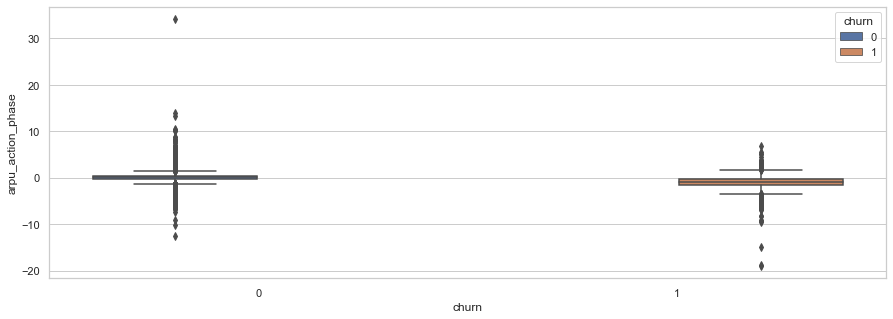

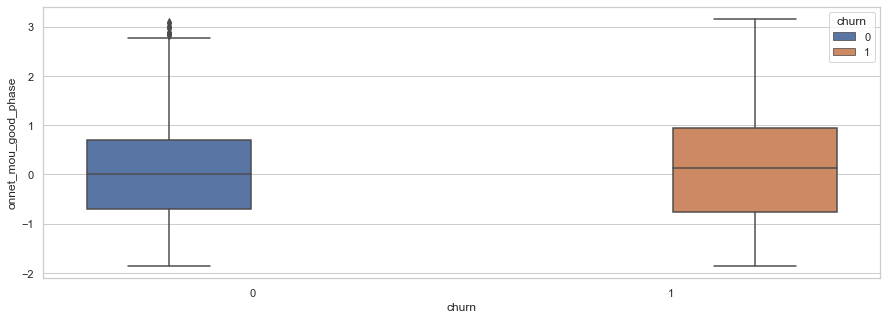

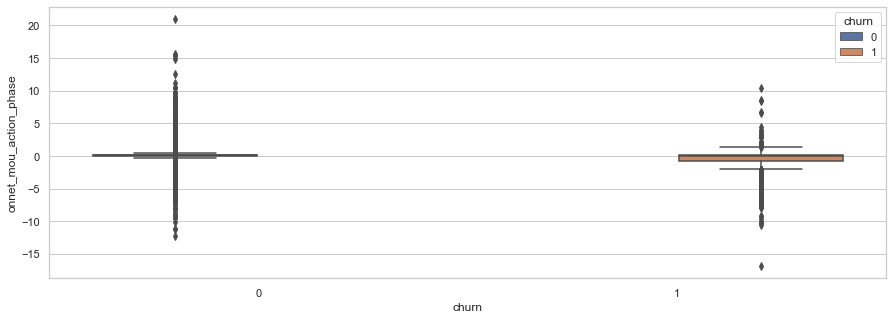

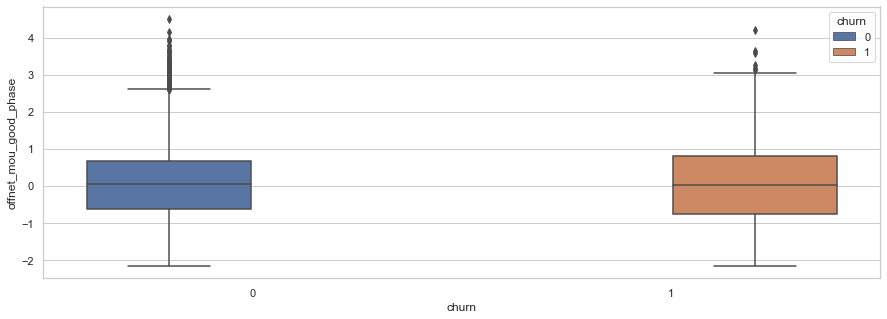

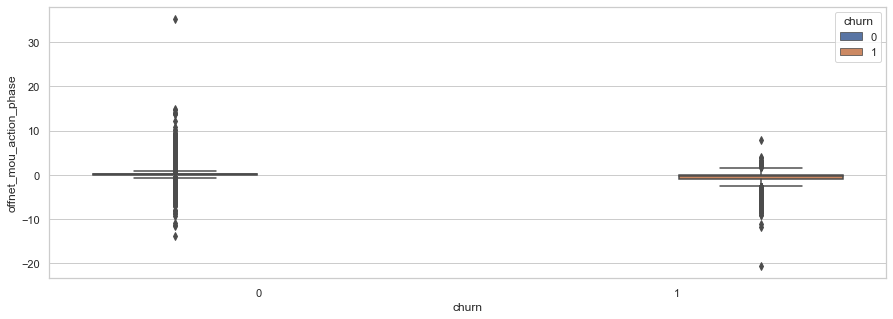

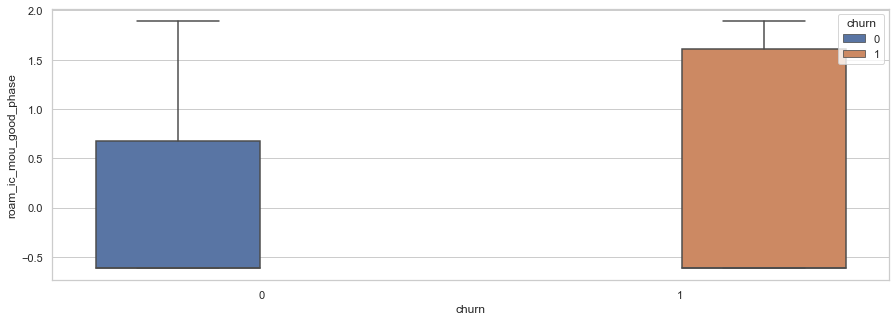

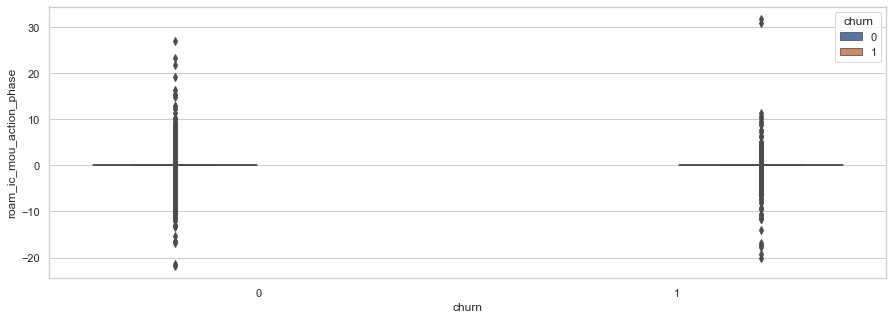

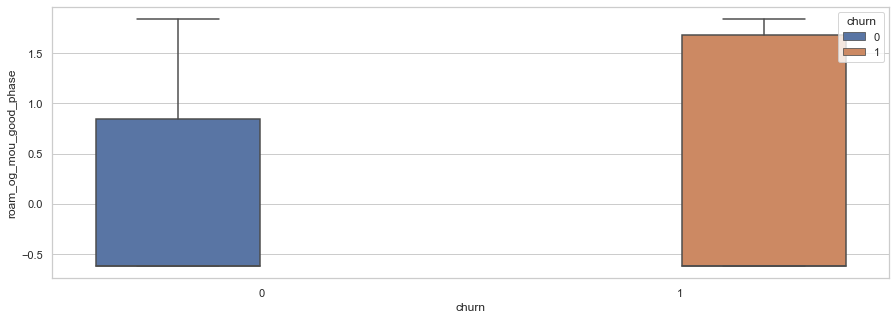

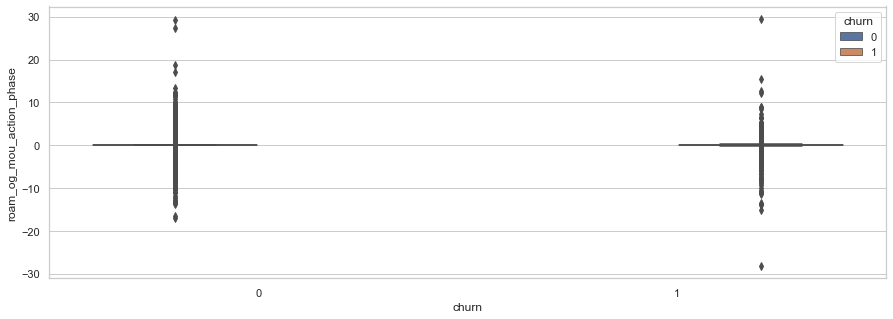

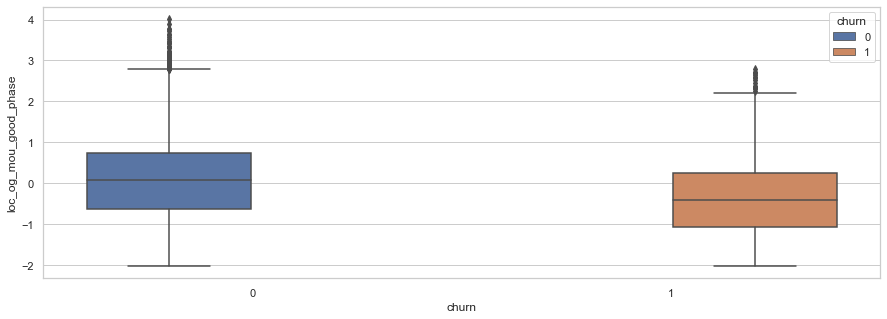

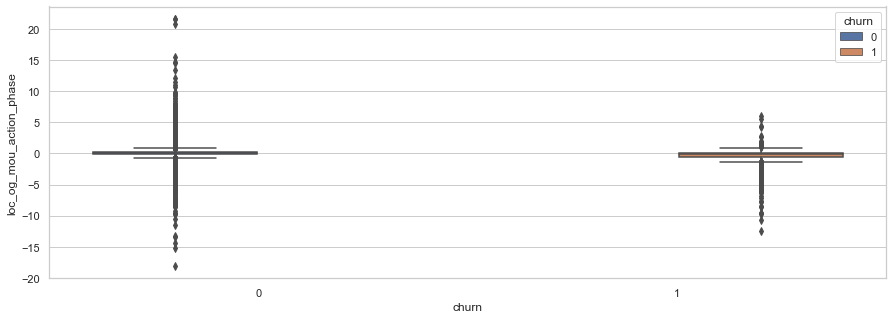

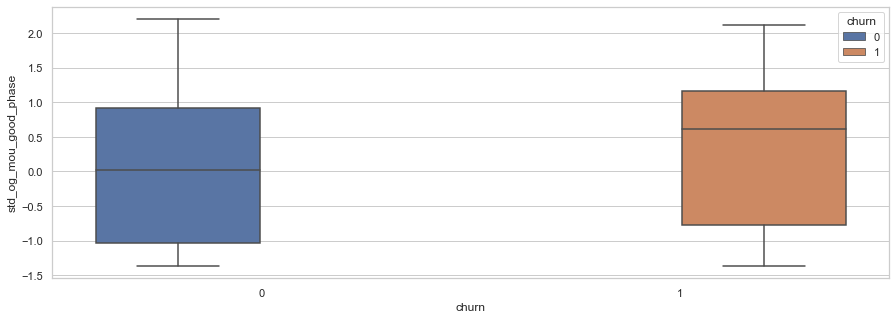

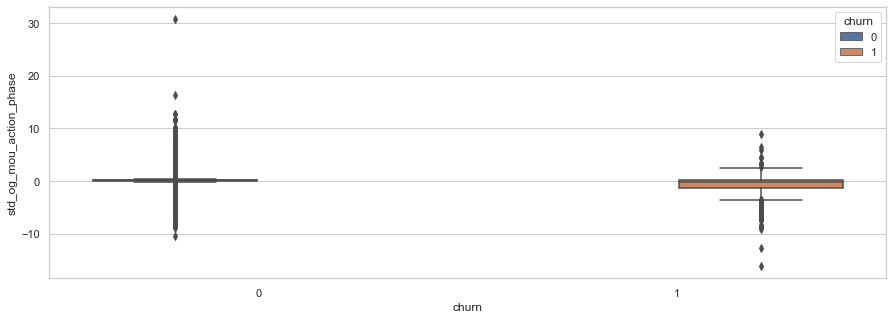

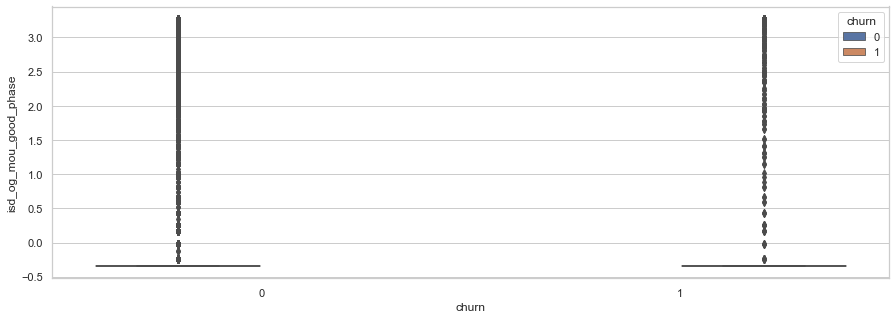

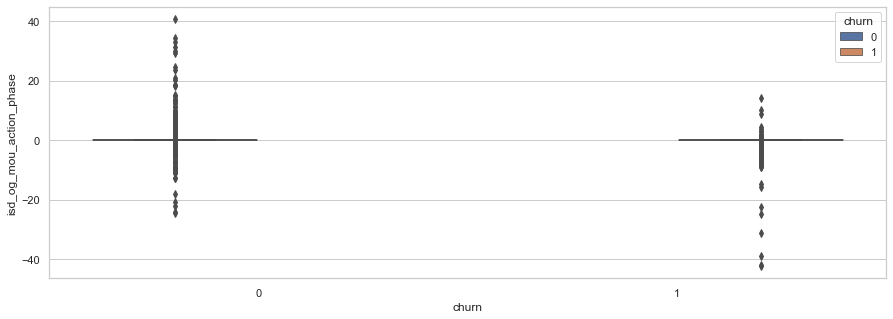

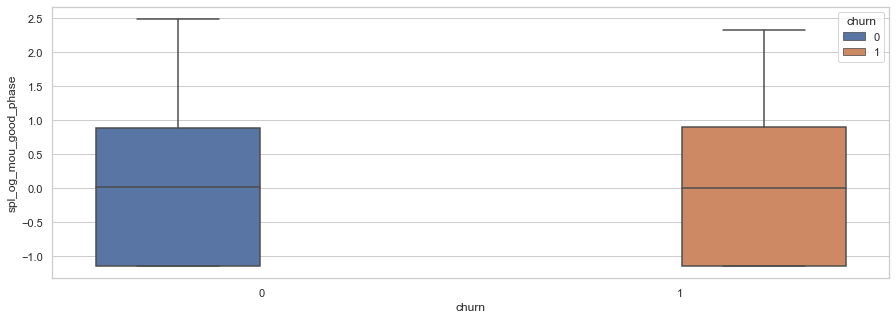

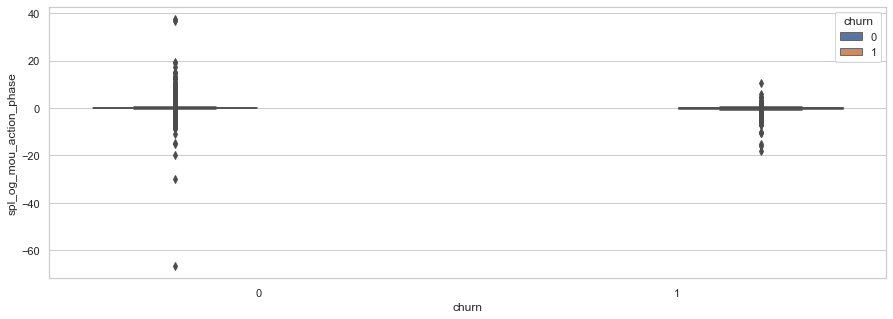

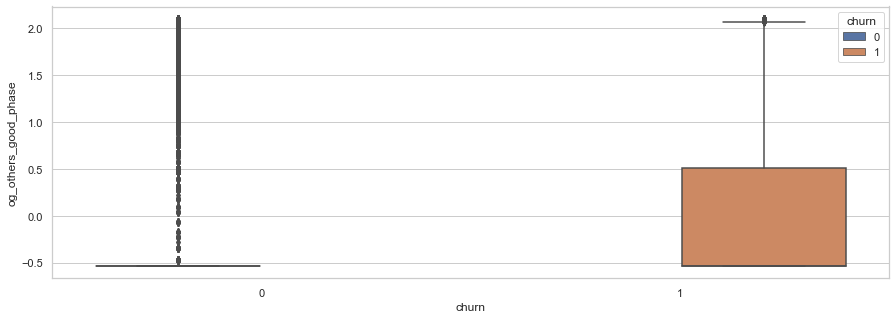

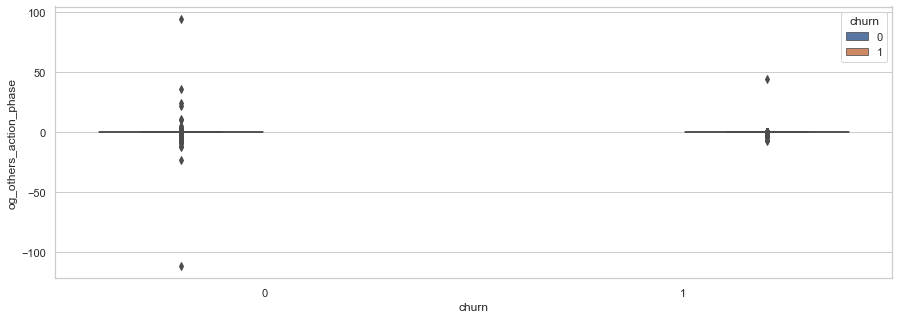

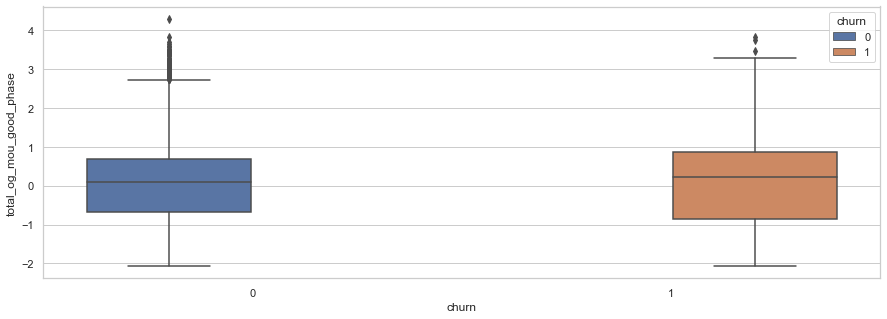

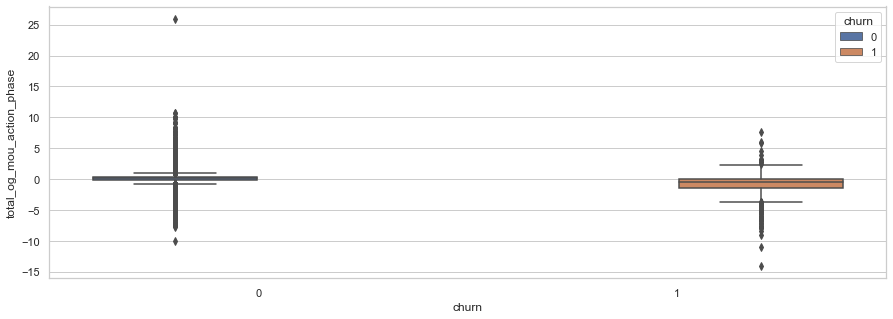

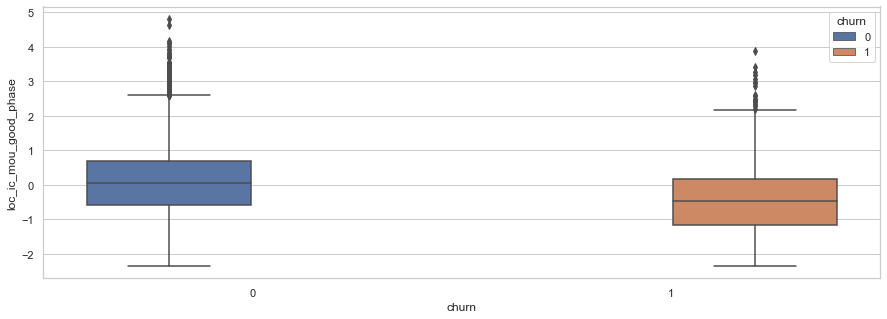

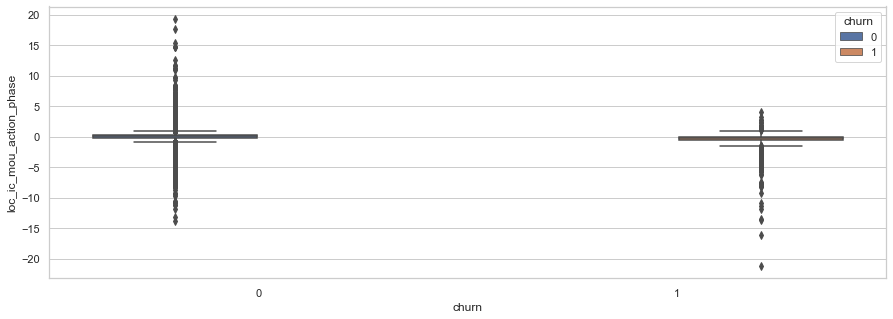

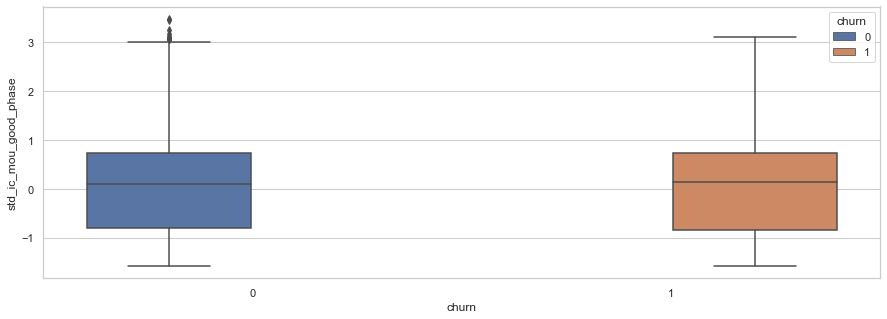

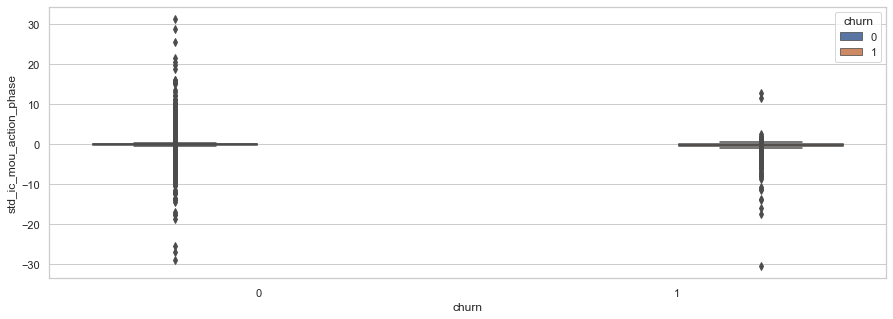

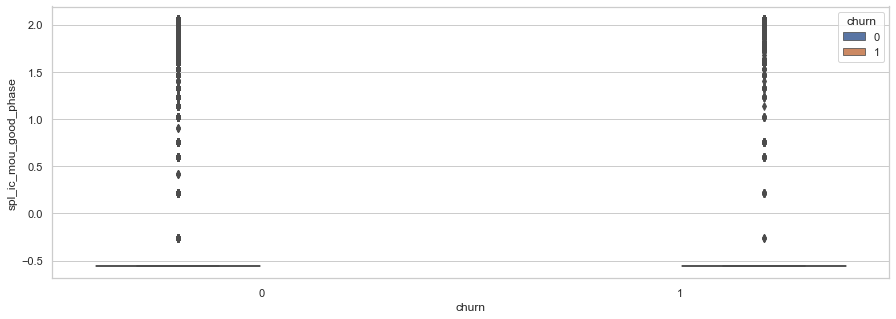

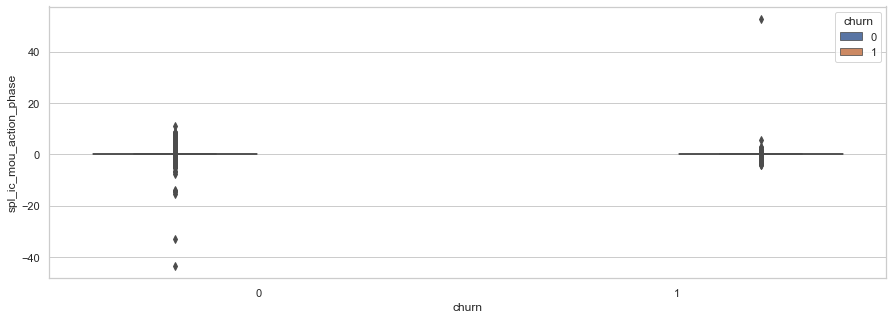

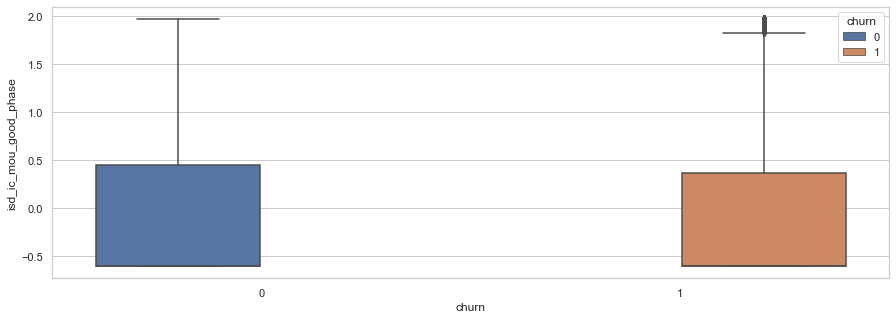

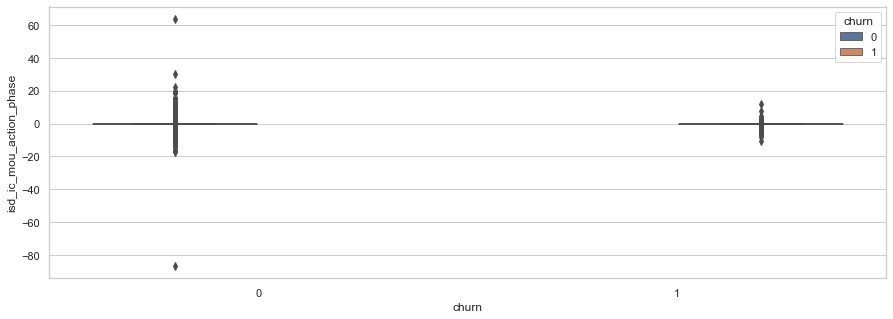

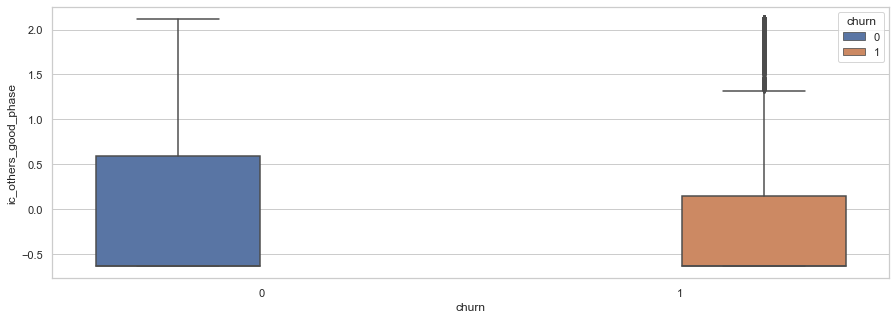

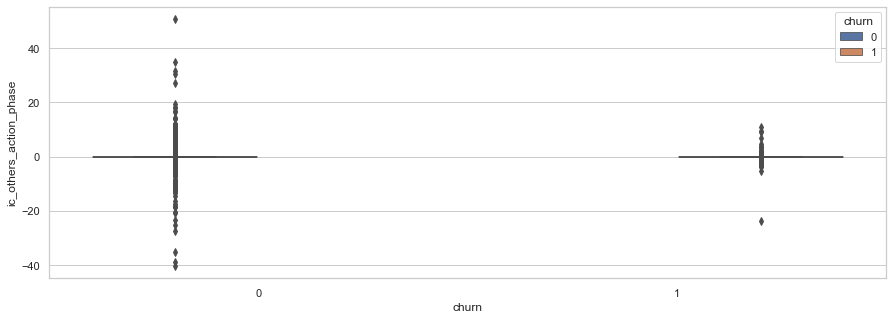

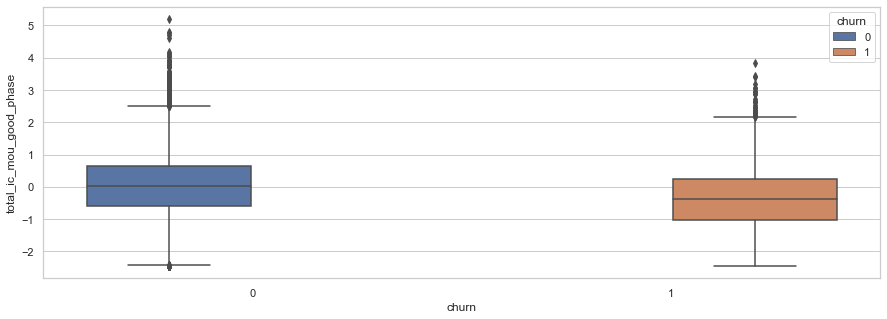

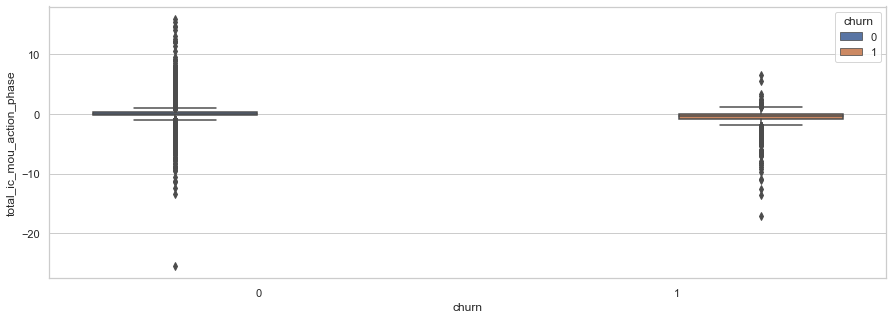

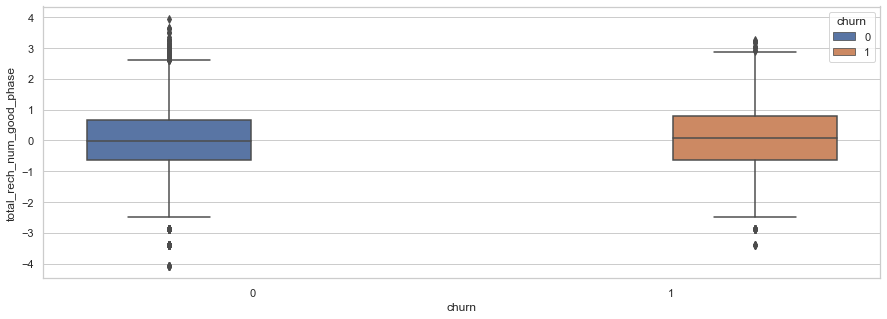

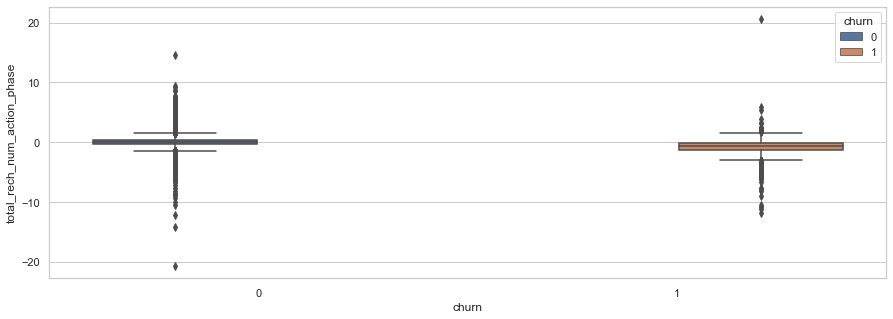

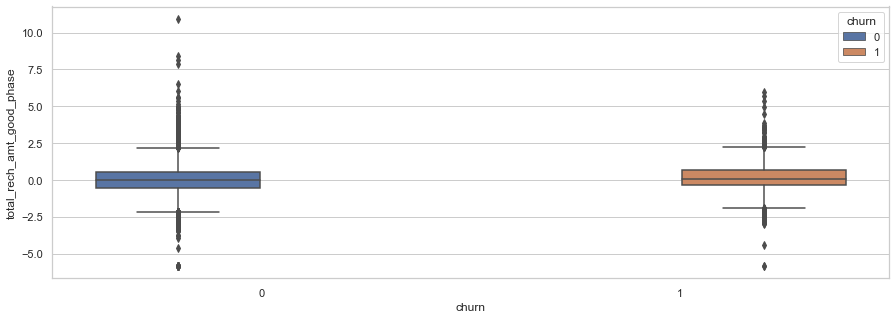

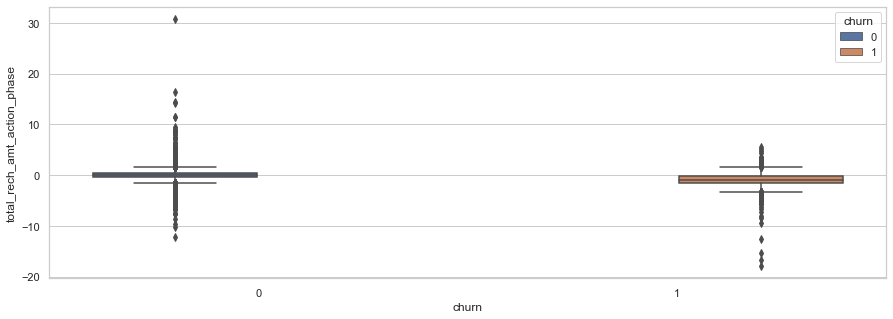

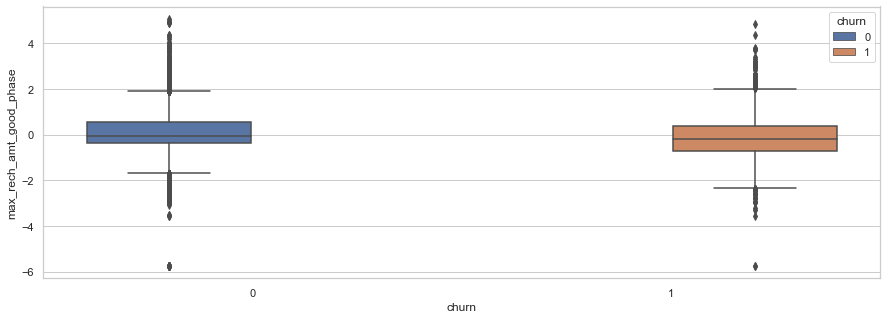

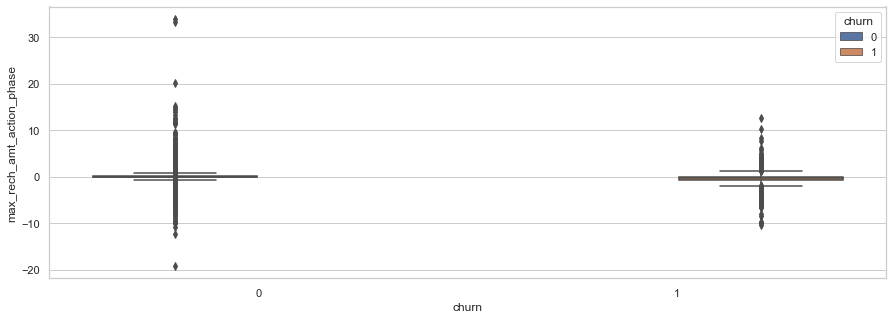

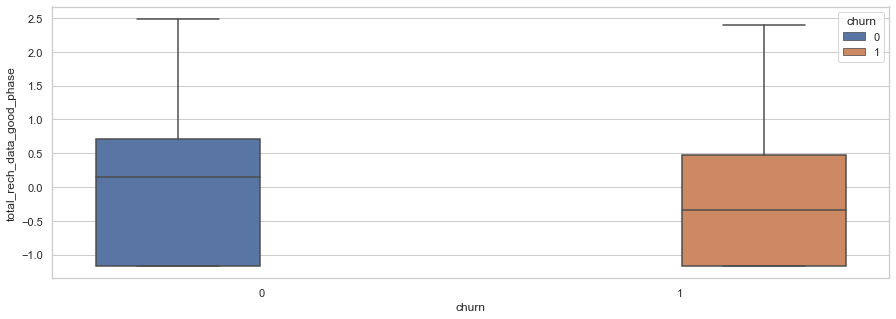

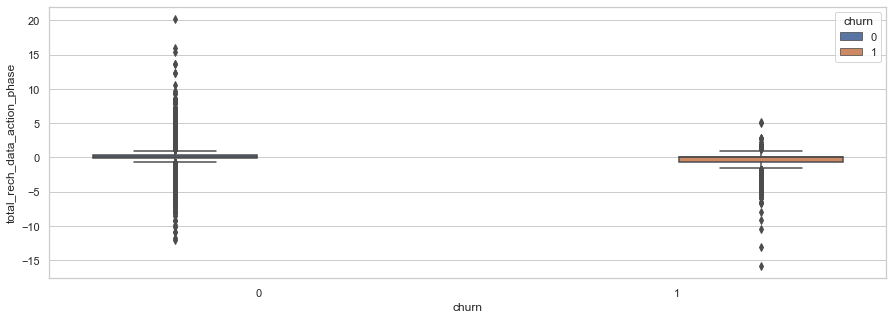

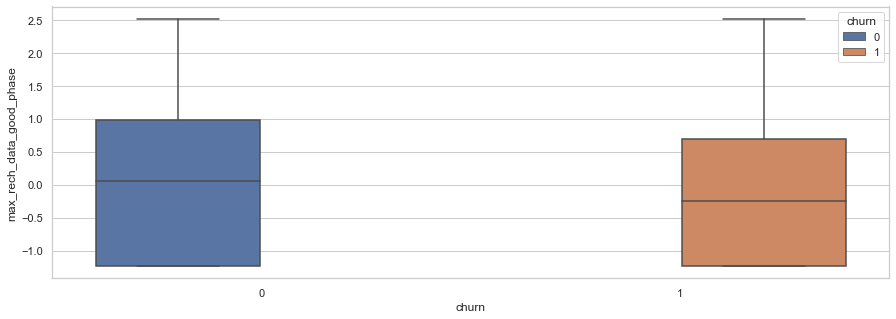

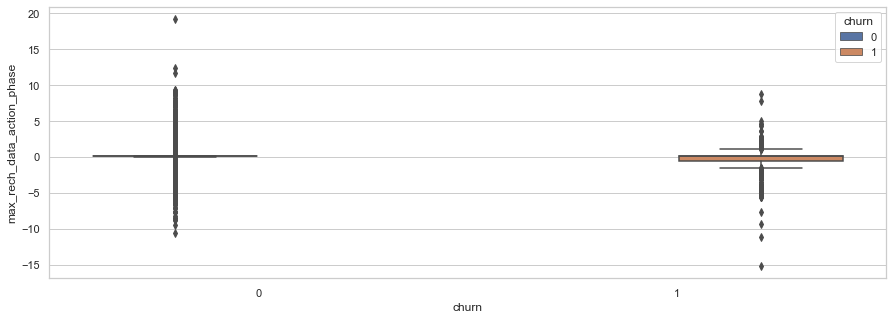

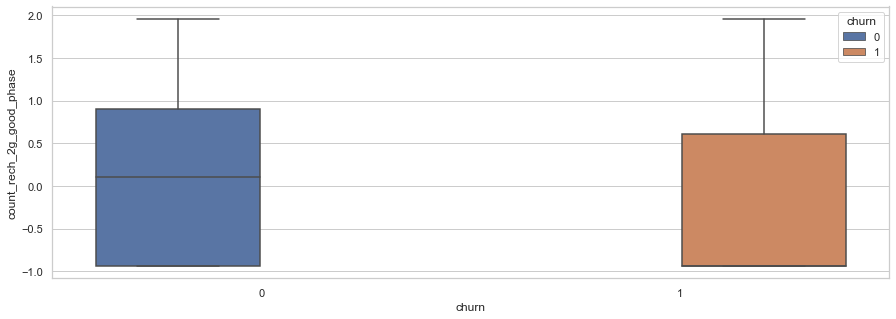

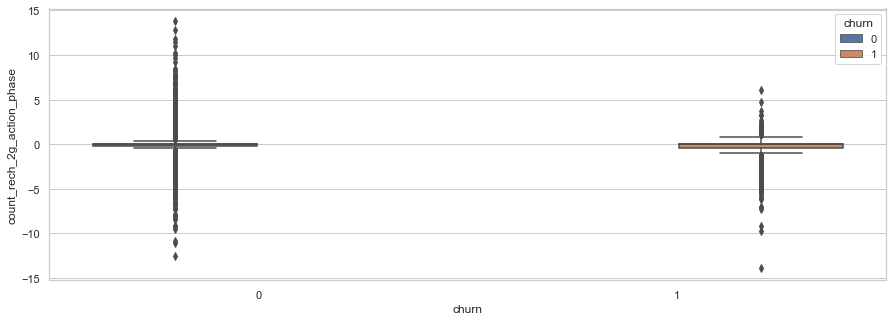

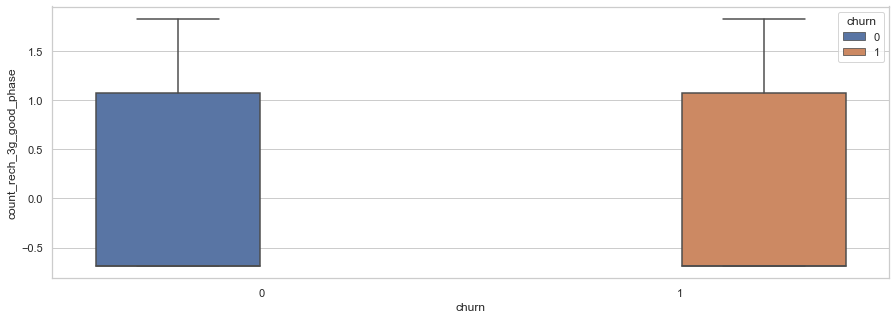

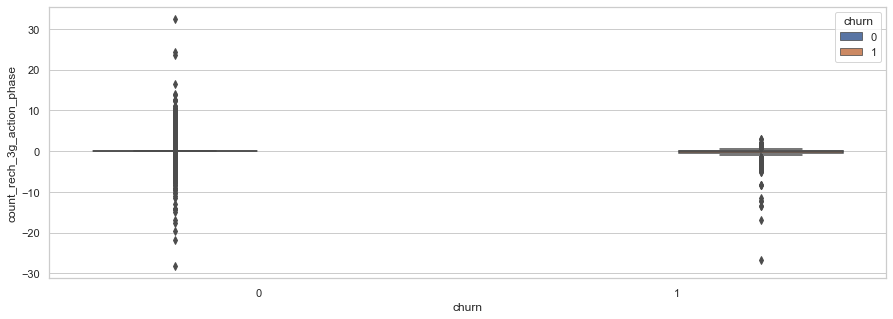

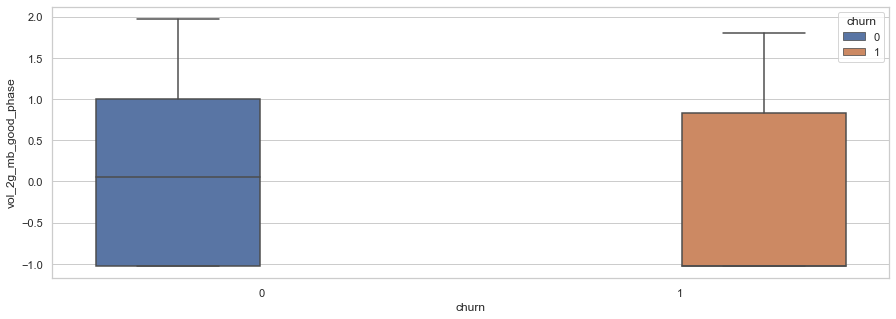

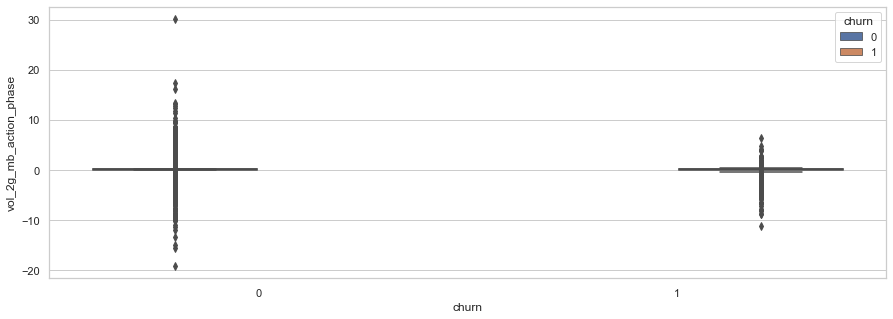

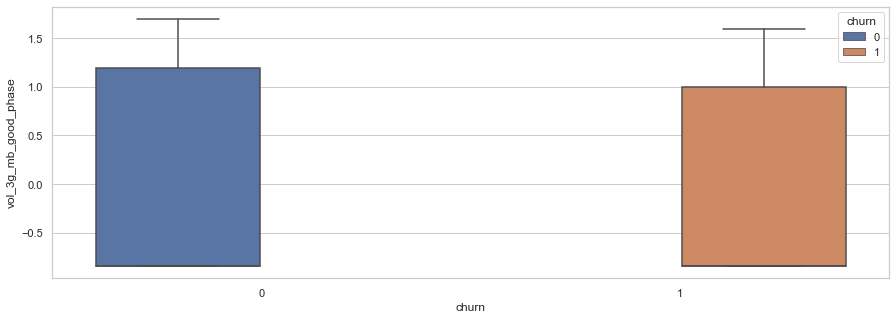

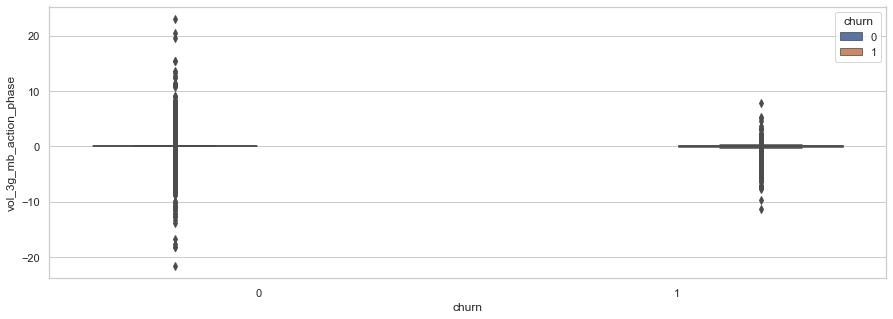

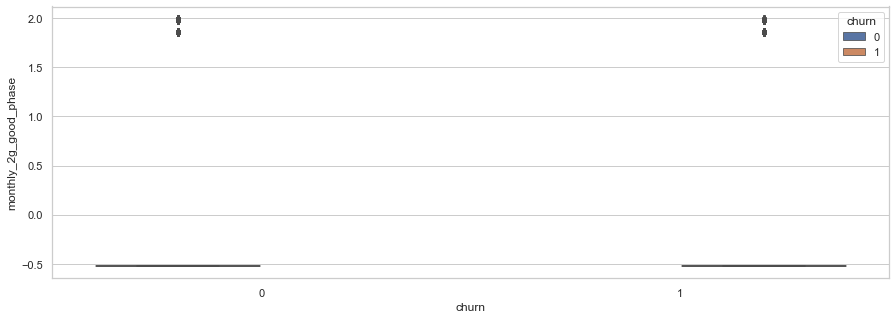

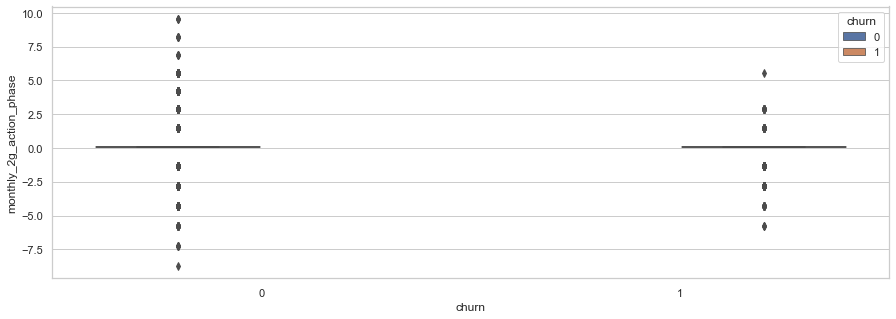

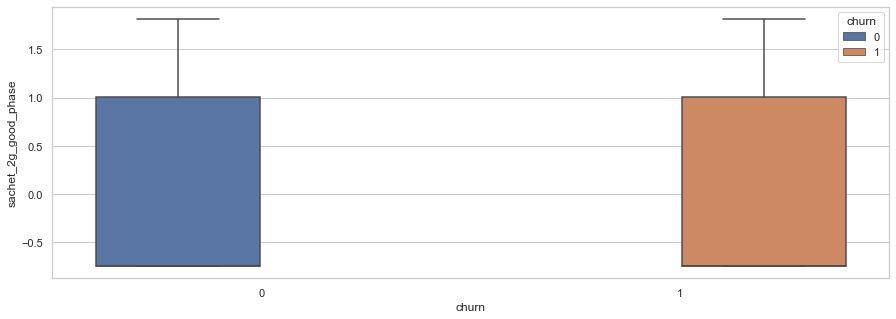

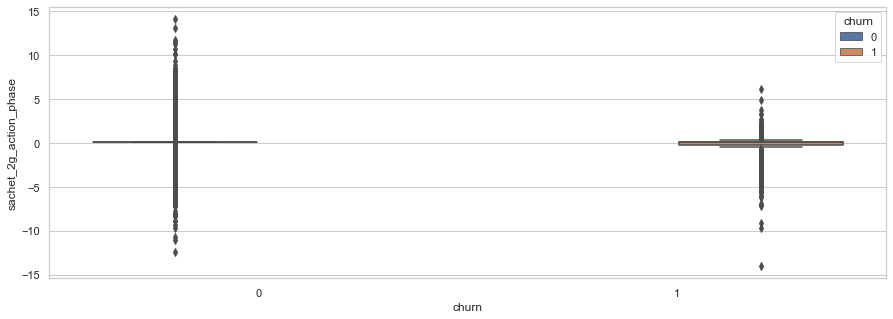

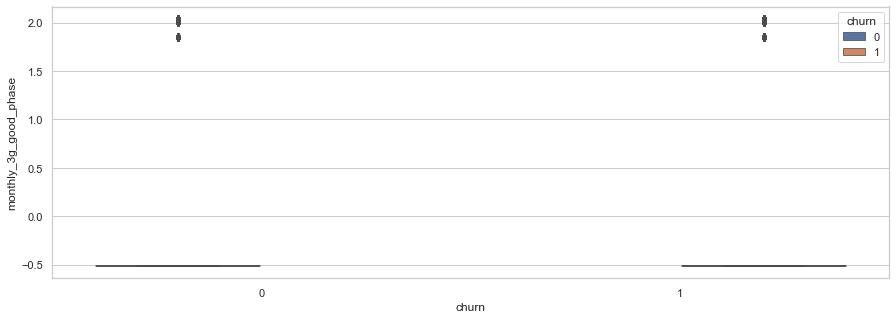

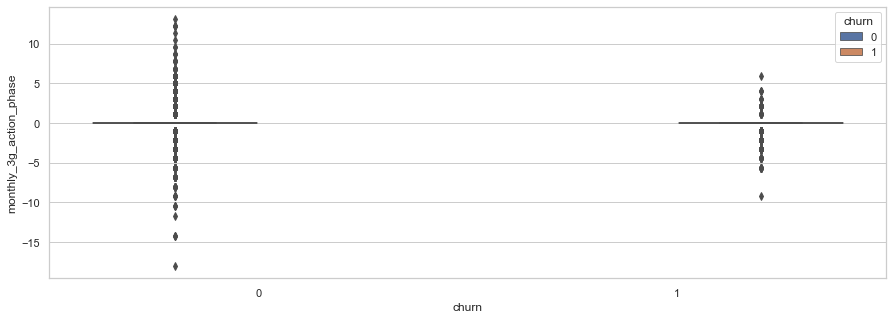

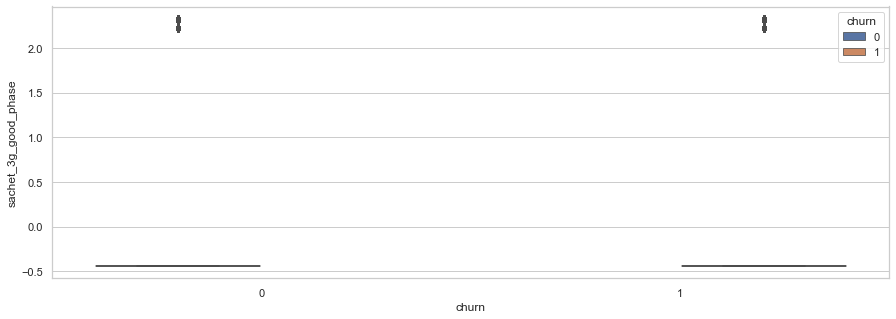

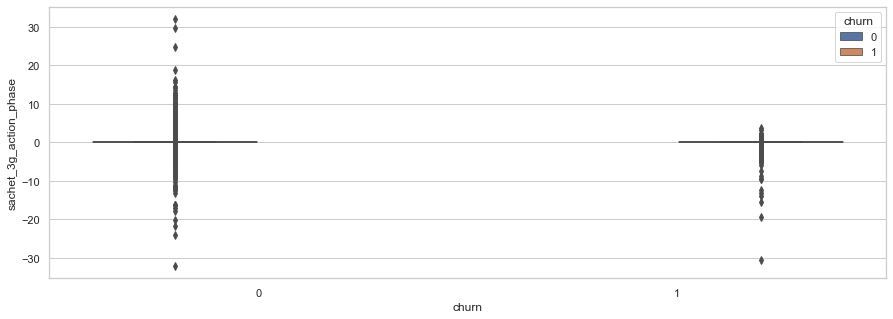

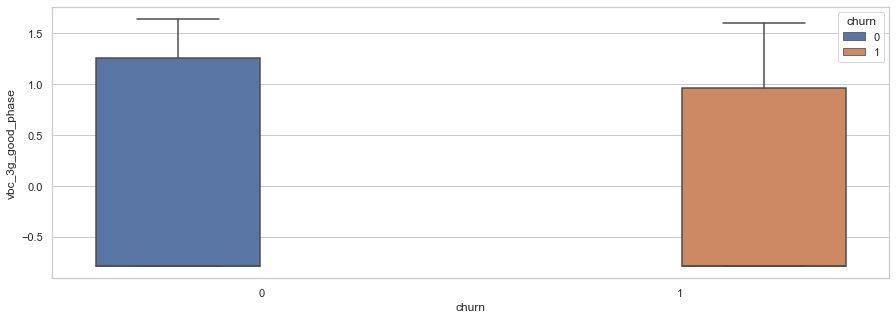

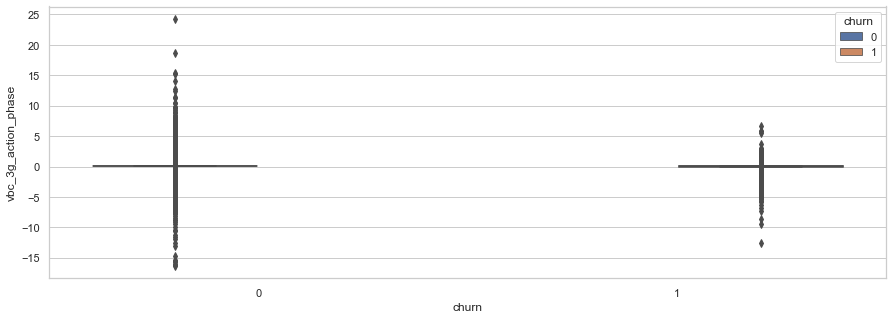

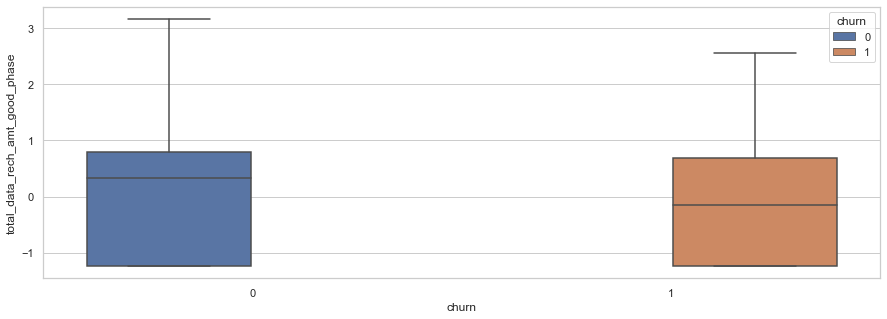

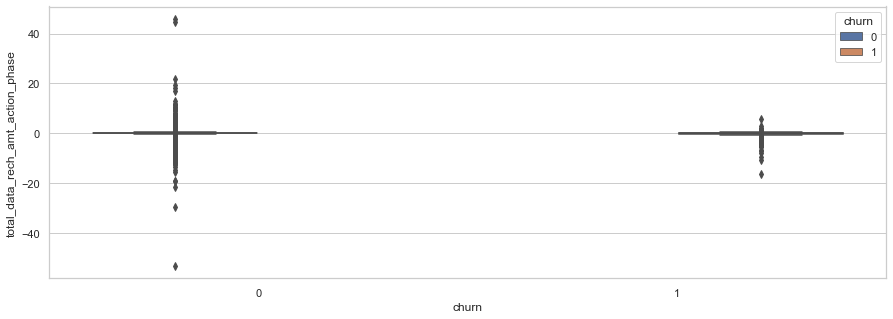

In [114]:
# Bivariate Analysis

cols = ['arpu','offnet_mou','onnet_mou','total_og_mou','total_ic_mou','total_rech_num',
        'total_rech_amt','total_rech_data','vol_2g_mb','vol_3g_mb','vbc_3g','total_data_rech_amt']
for col in telecom_df.columns:
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    

    sns.boxplot(x = x_axis, y = col , hue = "churn", data = telecom_df)

    plt.show()
    
    



In [115]:
for col in catCols:
    telecom_df[col]=telecom_df[col].astype(float)

In [116]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   night_pck_user_6                  30001 non-null  float64
 1   night_pck_user_7                  30001 non-null  float64
 2   night_pck_user_8                  30001 non-null  float64
 3   fb_user_6                         30001 non-null  float64
 4   fb_user_7                         30001 non-null  float64
 5   fb_user_8                         30001 non-null  float64
 6   aon                               30001 non-null  float64
 7   churn                             30001 non-null  float64
 8   arpu_good_phase                   30001 non-null  float64
 9   arpu_action_phase                 30001 non-null  float64
 10  onnet_mou_good_phase              30001 non-null  float64
 11  onnet_mou_action_phase            30001 non-null  float64
 12  offn

In [117]:
# divide data into train and test
X = telecom_df.drop("churn", axis = 1)
y = telecom_df.churn


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [119]:
# y_train = y_train.values.reshape(-1,1)
# y_test =y_test.values.reshape(-1,1)

In [120]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 71)
(21000,)
(9001, 71)
(9001,)


### Balancing data using ADASYN

#### ADASYN is similar to SMOTE, and derived from it, featuring just one important difference. it will bias the sample space (that is, the likelihood that any particular point will be chosen for duping) towards points which are located not in homogenous neighborhoods.

In [121]:
adasyn = ADASYN(random_state=100)
X_train,y_train = adasyn.fit_sample(X_train,y_train)

In [122]:
y_train.value_counts()

1.0    19565
0.0    19309
Name: churn, dtype: int64

In [123]:
# apply pca to train data
pca =PCA()

In [124]:
pca.fit(X_train)
tele_churn_pca = pca.fit_transform(X_train)

In [125]:

print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      17.29
1      27.21
2      33.69
3      40.02
4      44.60
5      48.39
6      51.99
7      54.85
8      57.59
9      60.18
10     62.50
11     64.69
12     66.78
13     68.71
14     70.56
15     72.37
16     74.05
17     75.59
18     77.10
19     78.46
20     79.80
21     81.08
22     82.33
23     83.50
24     84.62
25     85.67
26     86.72
27     87.70
28     88.67
29     89.57
30     90.43
31     91.26
32     91.99
33     92.71
34     93.43
35     94.11
36     94.78
37     95.39
38     95.97
39     96.50
40     96.98
41     97.37
42     97.74
43     98.07
44     98.37
45     98.61
46     98.79
47     98.94
48     99.08
49     99.21
50     99.33
51     99.44
52     99.53
53     99.61
54     99.69
55     99.76
56     99.82
57     99.86
58     99.90
59     99.93
60     99.95
61     99.97
62     99.98
63     99.99
64    100.00
65    100.00
66    100.00
67    100.00
68    100.00
69    100.00
70    100.00
dtype: float64


- 95% data is explained by 35 variables

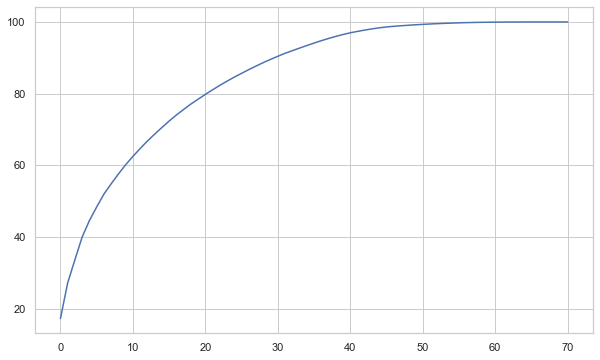

In [126]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(10,6)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

(38874, 35)
(38874,)
(9001, 35)
(9001,)


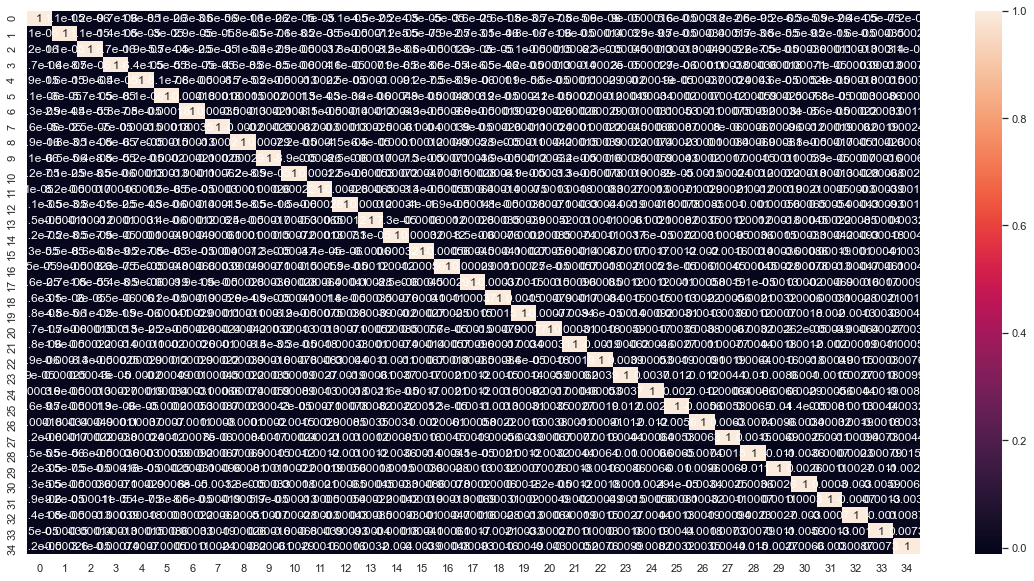

In [127]:
pca_final = IncrementalPCA(n_components = 35)

X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

X_train_pca = pd.DataFrame(data = X_train_pca)
X_test_pca = pd.DataFrame(data = X_test_pca)

print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)

#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

#plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corrmat, annot = True)
plt.show()



# Making Base models

In [128]:
# List to store the model scores
model_score_list = []

In [129]:
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# lr = LogisticRegression(solver='newton-cg')

# #Setting the range for class weights
# weights = np.linspace(0.0,0.99,200)

# #Creating a dictionary grid for grid search
# param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# #Fitting grid search to the train data with 5 folds
# gridsearch = GridSearchCV(estimator= lr, 
#                           param_grid= param_grid,
#                           cv=StratifiedKFold(), 
#                           n_jobs=-1, 
#                           scoring='recall', 
#                           verbose=2).fit(X_train_pca, y_train)

# #Ploting the score for different values of weight
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('precision')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)

In [130]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

## 1. Logistic Regression

In [131]:
y_train.value_counts()

1.0    19565
0.0    19309
Name: churn, dtype: int64

In [132]:
# Initialize the Logistic regression
model = LogisticRegression(class_weight="balanced", random_state=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
y_prob = model.predict_proba(X_test_pca)

acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)

model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  79.95
ROC AUC score :  81.67
Precision score :  27.17
Recall score :  83.73


In [133]:
# lr = RidgeClassifier()

# #Setting the range for class weights
# weights = np.linspace(0.0,0.99,200)

# #Creating a dictionary grid for grid search
# param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# #Fitting grid search to the train data with 5 folds
# gridsearch = GridSearchCV(estimator= lr, 
#                           param_grid= param_grid,
#                           cv=StratifiedKFold(), 
#                           n_jobs=-1, 
#                           scoring='precision', 
#                           verbose=2).fit(X_train_pca, y_train)

# #Ploting the score for different values of weight
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('precision')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)

## 2. Ridge Classifier

In [134]:
# initialize the Ridge Classifier
model = RidgeClassifier(class_weight="balanced", random_state=100)
model.fit(X_train_pca, y_train)

acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
print('Recall score : ', rec_score)
model_score_list.append({'model_name':'RidgeClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  79.95
ROC AUC score :  81.67
Precision score :  27.17
Recall score :  83.73


## 3. SGDClassifier

In [135]:
# initialize the SGDClassifier
model = SGDClassifier(class_weight='balanced', random_state=100)
model.fit(X_train_pca, y_train)
# predict the testing pca data
y_pred = model.predict(X_test_pca)

acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
# ROC AUC score
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
# Precision score
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
# Recall score
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)
# Model evaluation
# acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'SGDClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  80.14
ROC AUC score :  81.83
Precision score :  27.4
Recall score :  83.87


## 4. Random Forest (without Hyper parameter tuning)

In [136]:
# initialize the randomforest
model = RandomForestClassifier(class_weight='balanced', random_state=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  91.01
ROC AUC score :  73.16
Precision score :  46.47
Recall score :  51.73


## 5. Gradient Boosting

In [137]:
model = GradientBoostingClassifier(random_state=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)
model_score_list.append({'model_name':'GradientBoostingClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  82.44
ROC AUC score :  80.84
Precision score :  29.38
Recall score :  78.93


## 6. XG BOOSTING

In [138]:
model = XGBClassifier(random_state=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)
model_score_list.append({'model_name':'XGBClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

[22:59:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score :  89.1
ROC AUC score :  75.15
Precision score :  39.57
Recall score :  58.4


## 7. ADA Boosting

In [139]:
model = AdaBoostClassifier(random_state=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)
model_score_list.append({'model_name':'AdaBoostClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  79.71
ROC AUC score :  78.15
Precision score :  25.77
Recall score :  76.27


## 8. Random forest (with hyper parameter tuning)

In [140]:
classifier_rf = RandomForestClassifier(random_state=100, n_jobs=-1)
params = {
    'max_depth': [20,30],
    'min_samples_leaf': [40, 50],
    'max_features': [3,4],
    'n_estimators': [ 300,350]
}
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")
grid_search.fit(X_train_pca,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  3.6min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [20, 30], 'max_features': [3, 4],
                         'min_samples_leaf': [40, 50],
                         'n_estimators': [300, 350]},
             scoring='recall', verbose=1)

In [141]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=40,
                       n_estimators=300, n_jobs=-1, random_state=100)

In [142]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test_pca)
acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)
model_score_list.append({'model_name':'RandomForest(Hyper Param Tuning)', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  85.73
ROC AUC score :  80.89
Precision score :  33.92
Recall score :  75.07


__After doing hyperparameter tuning there is an improvement in recall score__

In [143]:
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
2,SGDClassifier,80.14,81.83,27.40,83.87
0,LogisticRegression,79.95,81.67,27.17,83.73
1,RidgeClassifier,79.95,81.67,27.17,83.73
4,GradientBoostingClassifier,82.44,80.84,29.38,78.93
6,AdaBoostClassifier,79.71,78.15,25.77,76.27
7,RandomForest(Hyper Param Tuning),85.73,80.89,33.92,75.07
5,XGBClassifier,89.10,75.15,39.57,58.40
3,RandomForestClassifier,91.01,73.16,46.47,51.73


#### We will choose the top 3 models based on recall values

In [144]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state = 100)

model =  RidgeClassifier(class_weight="balanced", random_state=100)
ridge = cross_val_score(model, X_train_pca, y_train, scoring='recall', cv = skf, n_jobs=-1)
print('RidgeClassifier cv_score_mean : ', round(ridge.mean() * 100, 2))
print('RidgeClassifier cv_score_std : ', round(ridge.std() * 100, 2))

model = SGDClassifier(class_weight='balanced', random_state=100)
sgd = cross_val_score(model, X_train_pca, y_train, scoring='recall', cv = skf, n_jobs=-1)
print('SGDClassifier cv_score_mean : ', round(sgd.mean() * 100, 2))
print('SGDClassifier cv_score_std : ', round(sgd.std() * 100, 2))

model = LogisticRegression(class_weight="balanced", random_state=100)
logi = cross_val_score(model, X_train_pca, y_train, scoring='recall', cv = skf, n_jobs=-1)
print('LogisticRegression cv_score_mean : ', round(logi.mean() * 100, 2))
print('LogisticRegression cv_score_std : ', round(logi.std() * 100, 2))


RidgeClassifier cv_score_mean :  84.36
RidgeClassifier cv_score_std :  0.64
SGDClassifier cv_score_mean :  83.58
SGDClassifier cv_score_std :  2.35
LogisticRegression cv_score_mean :  83.28
LogisticRegression cv_score_std :  0.76


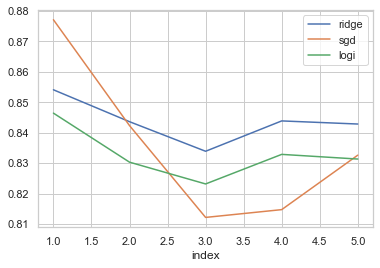

In [145]:
# plot the cv scores for the above 3 models
cv_scores_df = pd.DataFrame({'index':np.linspace(1,n_splits,n_splits),'ridge':ridge,'sgd':sgd,'logi':logi})
cv_scores_df.plot.line(x='index', y=['ridge','sgd','logi'])


For all the 3 models recall is fluctuating but overal it remains more consistent for __ridge classifier__

### Hyper parameter tuning ridge regressor

In [146]:

# Hyperparameter Tuning for KNeighborsClassifier
# number of folds
n_splits = 5
# Number of neighbors
n_neighbors =  [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
# Power parameter for the distance metric
p = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]

# Create the parameter grid
params = {
           'alpha': [300, 500,600,700,800],
           'max_iter':[1,2,5,6,7,8,9]
         }

# initialize the KNN model
model = RidgeClassifier(class_weight="balanced", random_state = 100)

# initialize the StratifiedKFold 
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state = 100)

# initialize the RandomSearchCV
#grid = GridSearchCV(estimator=model, param_grid=params, scoring='recall', n_jobs=-1, cv=skf.split(X,Y), verbose=3 )
grid = GridSearchCV(estimator=model, param_grid=params, scoring='recall', n_jobs=-1, cv=skf.split(X_train_pca,y_train), verbose=3 )

# fit the whole pca dataset
grid.fit(X_train_pca, y_train)

# print the grid results
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_)
print('\n Best parameters:')
print(grid.best_params_)


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 152 out of 175 | elapsed:    2.5s remaining:    0.3s



 Best estimator:
RidgeClassifier(alpha=500, class_weight='balanced', max_iter=1,
                random_state=100)

 Best score:
0.8435982622029133

 Best parameters:
{'alpha': 500, 'max_iter': 1}


[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    2.7s finished


In [147]:
model_master = grid.best_estimator_
y_pred = model_master.predict(X_test_pca)
acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
# ROC AUC score
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
# Precision score
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
# Recall score
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)

Accuracy Score :  77.84
ROC AUC score :  80.88
Precision score :  25.23
Recall score :  84.53


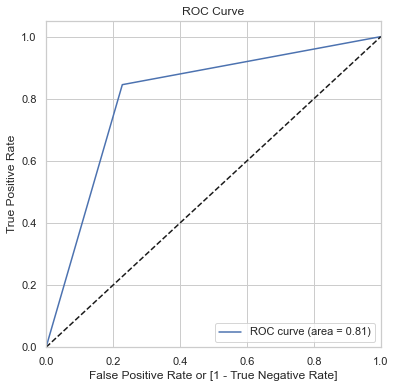

In [148]:
fpr, tpr, thresholds = roc_curve( y_test, y_pred, drop_intermediate = False )
auc_score = roc_auc_score( y_test, y_pred )
plt.figure(figsize=(6, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Making Model which is more interpretable

### For this we will use data without PCA

### Using Random forest for the first model 

In [190]:
model_RF = RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=50,
                       n_estimators=300, n_jobs=-1, random_state=100,class_weight="balanced")

In [203]:

rfe = RFE(model_RF, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [204]:
rfe.support_.sum()

10

In [205]:
selected_col = X_train.columns[rfe.support_]
len(selected_col)

10

In [206]:
X_train_rfe = X_train[selected_col]
X_test_rfe = X_test[selected_col]

In [207]:
model_RF = RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=50,
n_estimators=300, n_jobs=-1, random_state=100,class_weight="balanced")

In [208]:
model_RF.fit(X_train_rfe,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=4,
                       min_samples_leaf=50, n_estimators=300, n_jobs=-1,
                       random_state=100)

In [209]:
y_pred = model_RF.predict(X_test_rfe)

In [210]:
acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
# ROC AUC score
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
# Precision score
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
# Recall score
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)

Accuracy Score :  87.49
ROC AUC score :  83.42
Precision score :  37.9
Recall score :  78.53


In [211]:
model_RF.feature_importances_

array([0.23590893, 0.14513905, 0.05939906, 0.08097834, 0.07178036,
       0.10485546, 0.06580376, 0.07677814, 0.08759536, 0.07176154])

In [212]:
imp_df = pd.DataFrame({
    "Varname": X_train_rfe.columns,
    "Imp": model_RF.feature_importances_})

In [213]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,fb_user_8,0.235909
1,arpu_action_phase,0.145139
5,loc_ic_mou_action_phase,0.104855
8,total_rech_amt_action_phase,0.087595
3,roam_og_mou_action_phase,0.080978
7,total_ic_mou_action_phase,0.076778
4,loc_ic_mou_good_phase,0.071780
9,max_rech_amt_action_phase,0.071762
6,total_ic_mou_good_phase,0.065804
2,roam_ic_mou_action_phase,0.059399


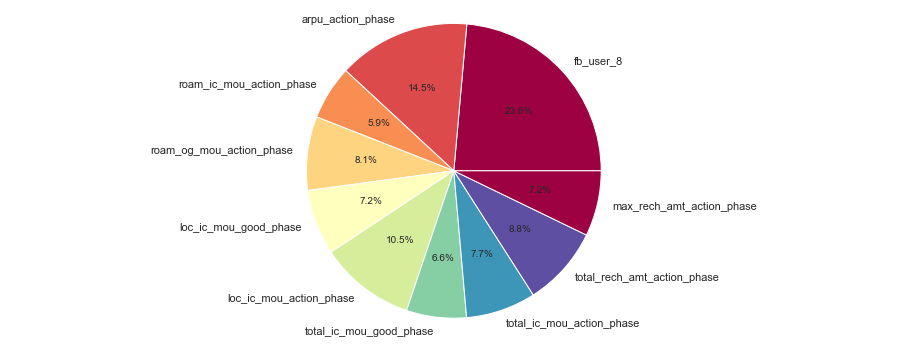

In [214]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

plt.figure(figsize=(16,6))
plt.pie(model_RF.feature_importances_, labels=X_train_rfe.columns, autopct='%1.1f%%', shadow=False, colors=colors)
plt.axis('equal')
plt.show()

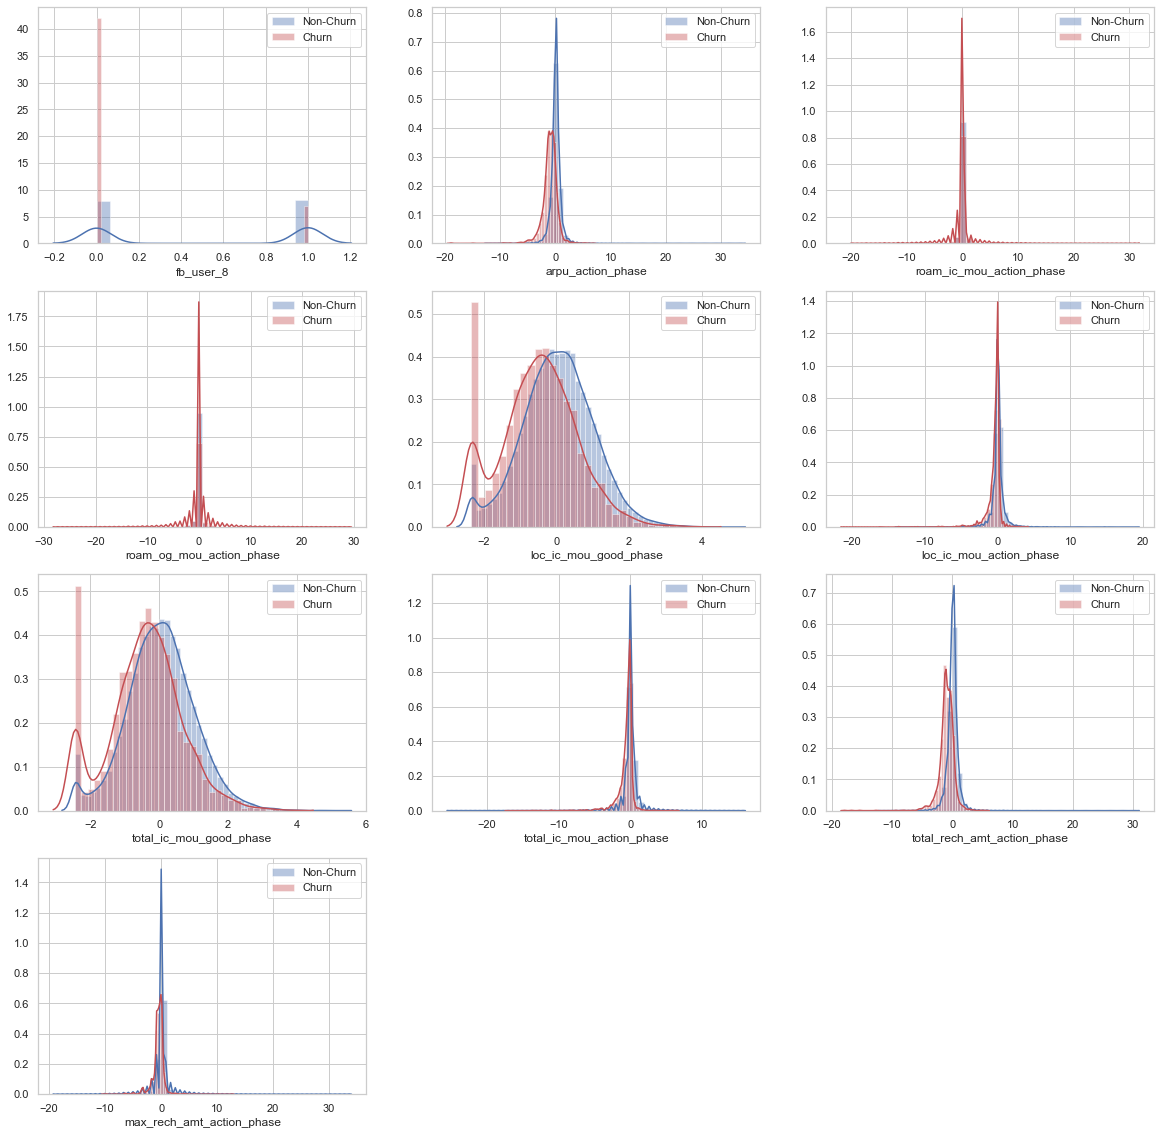

In [223]:
# Data preparation
data = telecom_df.copy()

#selected final list of features
cols = X_train_rfe.columns

plt.figure(figsize=(20,20))

data = data[cols]
data['churn'] = telecom_df['churn']

# plt.figure(figsize=(18,16))

for i, col in enumerate(cols):

    plt.subplot(4,3,i+1)
    ax = sns.distplot(data.loc[data['churn']==0, [col]], color='b', label='Non-Churn')
    ax = sns.distplot(data.loc[data['churn']==1, [col]], color='r', label='Churn')
    ax.legend()
    plt.xlabel(col)
#     plt.title('{0} dist plot'.format(col))


# Conclusion

#### fb_user_8
- Represents the fb user pack usage for the last 3 months with the increasing weightage. higher the value higher the churn rate

#### arpu_action_phase
- Represents the average revenue per user in the recent(8th) month. Lower value has got high churn rate. 

#### loc_ic_mou_action_phase
- Represents the total incoming minutes of usage calls to other mobiles in the recent month. lower value has got high churn rate.

#### total_rech_amt_action_phase
- Represents the total number of times recharged in the recent month. Lower the value higher the churn rate.

#### roam_og_mou_action_phase
- Represents the total outgoing minutes of usage on roaming in the recent month. Lower the value higher the churn rate.

#### total_ic_mou_action_phase	
- Represents the total outgoing minutes of usage calls to other mobiles in the recent month. Lower value has got high churn rate.

#### loc_ic_mou_good_phase	
- Represents the total incoming minutes of usage calls to other mobiles in the 6th and 7th month. lower value has got high churn rate.

#### max_rech_amt_action_phase
- Represents the maximum recharged amount in the recent month. Lower value comparatively got more churn than the other.

#### total_ic_mou_good_phase
- Represents the total outgoing minutes of usage calls to other mobiles in the 6th and 7th. Lower value has got high churn rate.

#### roam_ic_mou_action_phase
- Represents the total incoming minutes of usage on roaming in the recent month. Lower the value higher the churn rate.


## Hence we recommend the Telecom company to consider these driver variables which are strong indicators to manage customer churn.   

We need to focus more on the incoming and outgoing calls activity collectively for action phase, and the average revenue from the customers and provide more offers to the customers like this.